# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
sns.set_context('poster')
sns.set_style("whitegrid")

In [2]:
sns.__version__

'0.9.0'

In [4]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'
win = 1

# load data
net_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/network_stats.csv', index_col=0)
node_data = pd.read_csv(f'{RAM_dir}group_analysis/win_{win}/node_stats.csv', index_col=0)

# drop duplicates
net_data.drop_duplicates(inplace=True)
node_data.drop_duplicates(inplace=True)

Check the data

In [5]:
net_data.head(10)

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
1         alpha_aec   430     -0.381462      0.475069         -0.479936   
2   alpha_aec_ortho   430     -0.232843      0.414085         -0.200678   
3         alpha_coh   430     -0.377510      0.441747         -0.368589   
4         alpha_plv   430     -0.456733      0.413028         -0.517453   
5          beta_aec   430     -0.591918      0.545076         -0.733584   
6    beta_aec_ortho   430     -0.190959      0.150450         -0.227907   
7          beta_coh   430     -0.602860      0.557440         -0.454071   
8          beta_plv   430     -0.530226      0.432571         -0.270591   
9      broadband_ar   430     -0.059697      0.054679         -0.000801   
10  broadband_xcorr   430     -0.391484      0.405810         -0.339840   

    str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
1           0.474653              0.475251            0.471236   
2           0.412866              0.408954            0.308307   
3           0.476458              0.434604            0.312499   
4           0.434959              0.400411            0.288097   
5           0.613832              0.545029            0.516449   
6           0.109275              0.153355            0.173348   
7           0.632888              0.552317            0.575358   
8           0.382698              0.428318            0.560304   
9          -0.012570              0.043666            0.158527   
10          0.322122              0.379614            0.275970   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -0.377808           -0.375538               -0.387141   
2              -0.232903           -0.027842               -0.272014   
3              -0.370379           -0.173272               -0.410711   
4              -0.440434           -0.282706               -0.482510   
5              -0.589184           -0.499192               -0.610455   
6              -0.185806           -0.195632               -0.202685   
7              -0.607626           -0.659224               -0.596232   
8              -0.534052           -0.777169               -0.502381   
9              -0.046249           -0.147955               -0.041944   
10             -0.369491           -0.010941               -0.414334   

   fc_measure  str_not_spike_beta_num       band    subj hand   age gender  \
1         aec                0.480301      alpha  R1175N    R  34.0      M   
2   aec_ortho                0.436273      alpha  R1175N    R  34.0      M   
3         coh                0.459005      alpha  R1175N    R  34.0      M   
4         plv                0.429426      alpha  R1175N    R  34.0      M   
5         aec                0.553404       beta  R1175N    R  34.0      M   
6   aec_ortho                0.154134       beta  R1175N    R  34.0      M   
7         coh                0.556195       beta  R1175N    R  34.0      M   
8         plv                0.423579       beta  R1175N    R  34.0      M   
9          ar                0.038114  broadband  R1175N    R  34.0      M   
10      xcorr                0.406693  broadband  R1175N    R  34.0      M   

    race  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  
6    1.0  
7    1.0  
8    1.0  
9    1.0  
10   1.0

In [6]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2751 entries, 1 to 2793
Data columns (total 19 columns):
band_measure              2751 non-null object
n_tp                      2751 non-null int64
str_beta_bin              2709 non-null float64
str_beta_num              2709 non-null float64
str_soz_beta_bin          1911 non-null float64
str_soz_beta_num          1911 non-null float64
str_not_soz_beta_num      1903 non-null float64
str_spike_beta_num        1743 non-null float64
str_not_soz_beta_bin      1903 non-null float64
str_spike_beta_bin        1743 non-null float64
str_not_spike_beta_bin    1735 non-null float64
fc_measure                2751 non-null object
str_not_spike_beta_num    1735 non-null float64
band                      2751 non-null object
subj                      2751 non-null object
hand                      2688 non-null object
age                       2730 non-null float64
gender                    2751 non-null object
race                      2646 non-nu

In [7]:
net_data.describe()

n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
count  2751.000000   2709.000000   2709.000000       1911.000000   
mean   1095.192657     -0.265175      0.120097         -0.215612   
std    1354.360861      1.332430      0.425345          1.148826   
min      15.000000    -15.194886     -7.030166        -10.517256   
25%     214.000000     -0.636339     -0.050200         -0.605501   
50%     631.000000     -0.204728      0.078633         -0.170138   
75%    1209.000000      0.106638      0.279291          0.147708   
max    6184.000000     22.368412      4.797653         10.363253   

       str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
count       1911.000000           1903.000000         1743.000000   
mean           0.109284              0.096227            0.121487   
std            0.362266              0.372722            0.379672   
min           -3.167316             -2.828032           -3.392342   
25%           -0.054218             -0.063702           -0.051346   
50%            0.070078              0.056151            0.083419   
75%            0.267297              0.251744            0.287594   
max            3.882369              3.173335            3.336776   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count           1903.000000         1743.000000             1735.000000   
mean              -0.208572           -0.228440               -0.199508   
std                1.203786            1.248329                1.241373   
min              -11.006085          -10.972012              -10.048768   
25%               -0.570234           -0.648205               -0.611382   
50%               -0.173361           -0.189174               -0.157709   
75%                0.131503            0.155570                0.170849   
max                8.880437           11.748442               11.415135   

       str_not_spike_beta_num          age         race  
count             1735.000000  2730.000000  2646.000000  
mean                 0.093345    36.476923     2.682540  
std                  0.387117    12.115921     1.212932  
min                 -3.961256    18.000000     1.000000  
25%                 -0.067793    27.000000     2.000000  
50%                  0.054042    35.500000     2.000000  
75%                  0.243124    47.000000     4.000000  
max                  3.555290    66.000000     7.000000

In [8]:
node_data.head(10)

elec     band_measure  n_tp  elec_spike  elec_in_soz  str_soz_beta_bin  \
1   LAST4        alpha_aec   430    0.032558            0         -0.153076   
2   LAST4  alpha_aec_ortho   430    0.032558            0          0.126052   
3   LAST4        alpha_coh   430    0.032558            0          0.405668   
4   LAST4        alpha_plv   430    0.032558            0          0.482686   
5   LAST4         beta_aec   430    0.032558            0         -0.273617   
6   LAST4   beta_aec_ortho   430    0.032558            0         -0.234792   
7   LAST4         beta_coh   430    0.032558            0          0.364032   
8   LAST4         beta_plv   430    0.032558            0          0.254381   
9   LAST4     broadband_ar   430    0.032558            0         -0.017083   
10  LAST4  broadband_xcorr   430    0.032558            0         -0.137765   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -0.472031           -0.193966               -0.481458   
2               0.010644            0.093605               -0.007687   
3               0.361097            0.593013                0.329859   
4               0.417442            0.590215                0.400308   
5              -0.220614           -0.185055               -0.225859   
6               0.081978            0.044026                0.054001   
7              -0.303491           -0.096791               -0.289582   
8              -0.276840           -0.181959               -0.250835   
9              -0.006951           -0.085486               -0.018099   
10              0.253946            0.469436                0.203278   

    str_beta_bin  ...           region       x        y          z  type  \
1      -0.464649  ...   middletemporal -61.879  5.12479 -25.433811     S   
2       0.010749  ...   middletemporal -61.879  5.12479 -25.433811     S   
3       0.371414  ...   middletemporal -61.879  5.12479 -25.433811     S   
4       0.443917  ...   middletemporal -61.879  5.12479 -25.433811     S   
5      -0.232512  ...   middletemporal -61.879  5.12479 -25.433811     S   
6       0.062397  ...   middletemporal -61.879  5.12479 -25.433811     S   
7      -0.281556  ...   middletemporal -61.879  5.12479 -25.433811     S   
8      -0.260791  ...   middletemporal -61.879  5.12479 -25.433811     S   
9      -0.018258  ...   middletemporal -61.879  5.12479 -25.433811     S   
10      0.233949  ...   middletemporal -61.879  5.12479 -25.433811     S   

      subj hand   age  gender  race  
1   R1175N    R  34.0       M   1.0  
2   R1175N    R  34.0       M   1.0  
3   R1175N    R  34.0       M   1.0  
4   R1175N    R  34.0       M   1.0  
5   R1175N    R  34.0       M   1.0  
6   R1175N    R  34.0       M   1.0  
7   R1175N    R  34.0       M   1.0  
8   R1175N    R  34.0       M   1.0  
9   R1175N    R  34.0       M   1.0  
10  R1175N    R  34.0       M   1.0  

[10 rows x 27 columns]

In [9]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288876 entries, 1 to 293748
Data columns (total 27 columns):
elec                      288876 non-null object
band_measure              288876 non-null object
n_tp                      288876 non-null int64
elec_spike                288876 non-null float64
elec_in_soz               288876 non-null int64
str_soz_beta_bin          191751 non-null float64
str_not_soz_beta_bin      177069 non-null float64
str_spike_beta_bin        173838 non-null float64
str_not_spike_beta_bin    155270 non-null float64
str_beta_bin              280917 non-null float64
str_soz_beta_num          191751 non-null float64
str_not_soz_beta_num      177069 non-null float64
str_spike_beta_num        173838 non-null float64
str_beta_num              280917 non-null float64
str_not_spike_beta_num    155270 non-null float64
fc_measure                288876 non-null object
band                      288876 non-null object
region                    259056 non-null objec

In [10]:
node_data.describe()

n_tp     elec_spike    elec_in_soz  str_soz_beta_bin  \
count  288876.000000  288876.000000  288876.000000     191751.000000   
mean     1014.304892       0.020021       0.054158         -0.093683   
std      1295.390699       0.042090       0.226330          1.198322   
min        11.000000       0.000000       0.000000        -29.042425   
25%       166.000000       0.000000       0.000000         -0.387175   
50%       558.000000       0.003846       0.000000         -0.072464   
75%      1190.000000       0.018868       0.000000          0.184315   
max      6184.000000       0.523810       1.000000         34.486550   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count         177069.000000       173838.000000           155270.000000   
mean              -0.129946           -0.097614               -0.134029   
std                1.255819            1.267474                1.253856   
min              -50.197959          -31.979384              -51.584789   
25%               -0.446786           -0.437122               -0.471131   
50%               -0.102426           -0.084851               -0.104410   
75%                0.154137            0.194332                0.169510   
max               27.666095           32.106575               28.388302   

        str_beta_bin  str_soz_beta_num  str_not_soz_beta_num  \
count  280917.000000     191751.000000         177069.000000   
mean       -0.172856          0.057666              0.076565   
std         1.412488          0.361878              0.390370   
min       -51.197817         -8.286508             -7.864474   
25%        -0.509402         -0.057769             -0.050575   
50%        -0.118788          0.033797              0.044745   
75%         0.162748          0.167443              0.196919   
max        34.486550          9.176234             14.394327   

       str_spike_beta_num   str_beta_num  str_not_spike_beta_num  \
count       173838.000000  280917.000000           155270.000000   
mean             0.063606       0.098081                0.077230   
std              0.397437       0.438430                0.399001   
min             -7.474270      -8.115780               -7.721516   
25%             -0.059738      -0.047667               -0.053562   
50%              0.037940       0.058010                0.044700   
75%              0.182795       0.227452                0.199529   
max              8.984809      14.644936               14.772548   

                   x             y              z            age          race  
count  203973.000000  203973.00000  203973.000000  284445.000000  279804.00000  
mean       -2.912268      -6.25583       2.756956      36.711185       2.69281  
std        47.750456      37.48763      51.075621      12.207718       1.22044  
min      -165.993000    -143.90900    -402.070855      18.000000       1.00000  
25%       -41.791000     -29.97060     -17.683770      27.000000       2.00000  
50%        -5.946720      -7.80492       3.554198      36.000000       2.00000  
75%        36.896300      17.07770      30.948486      47.000000       4.00000  
max       173.816000     207.77000      93.980799      66.000000       7.00000

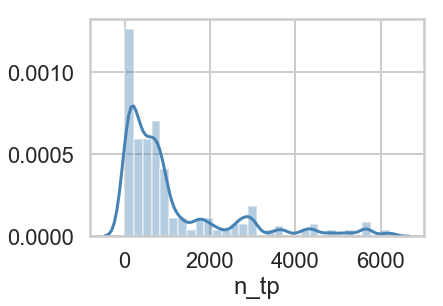

In [11]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [12]:
net_data.subj.nunique()

128

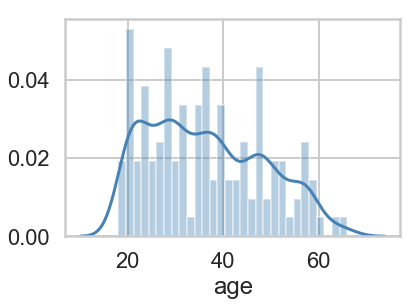

In [13]:
net_data['age'].replace(to_replace=0, value=None, inplace=True)
sns.distplot(net_data['age'].dropna(), bins=30, color='steelblue')
mean_age = net_data['age'].mean()

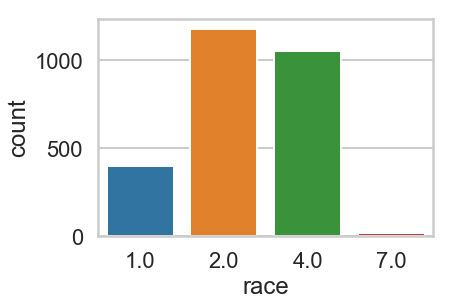

In [14]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

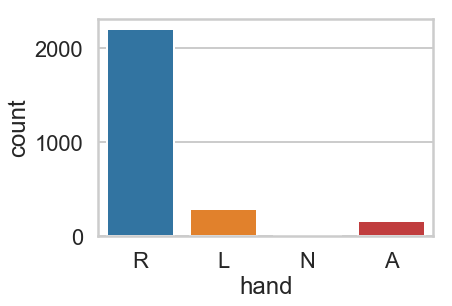

In [15]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

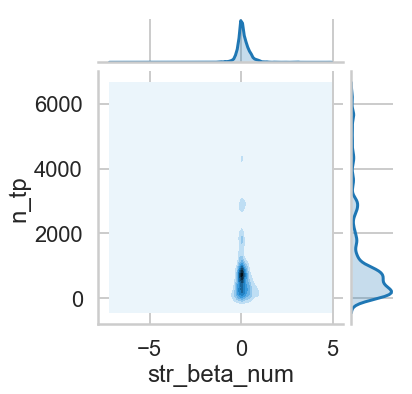

In [16]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

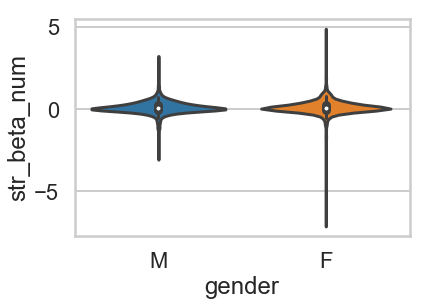

In [17]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [18]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [19]:
net_data.dropna().subj.nunique()
#net_data[net_data.band_measure == 'theta_plv'].dropna().subj.count()

73

In [19]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46535 entries, 1 to 211459
Data columns (total 27 columns):
elec                      46535 non-null object
band_measure              46535 non-null object
n_tp                      46535 non-null int64
elec_spike                46535 non-null float64
elec_in_soz               46535 non-null int64
str_soz_beta_bin          46535 non-null float64
str_not_soz_beta_bin      46535 non-null float64
str_spike_beta_bin        46535 non-null float64
str_not_spike_beta_bin    46535 non-null float64
str_beta_bin              46535 non-null float64
str_soz_beta_num          46535 non-null float64
str_not_soz_beta_num      46535 non-null float64
str_spike_beta_num        46535 non-null float64
str_beta_num              46535 non-null float64
str_not_spike_beta_num    46535 non-null float64
fc_measure                46535 non-null object
band                      46535 non-null object
region                    46535 non-null object
x                

In [20]:
# save
net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_data_clean.csv')

## Effects on Network Measures

test if intereictal spike regularly change network strength.

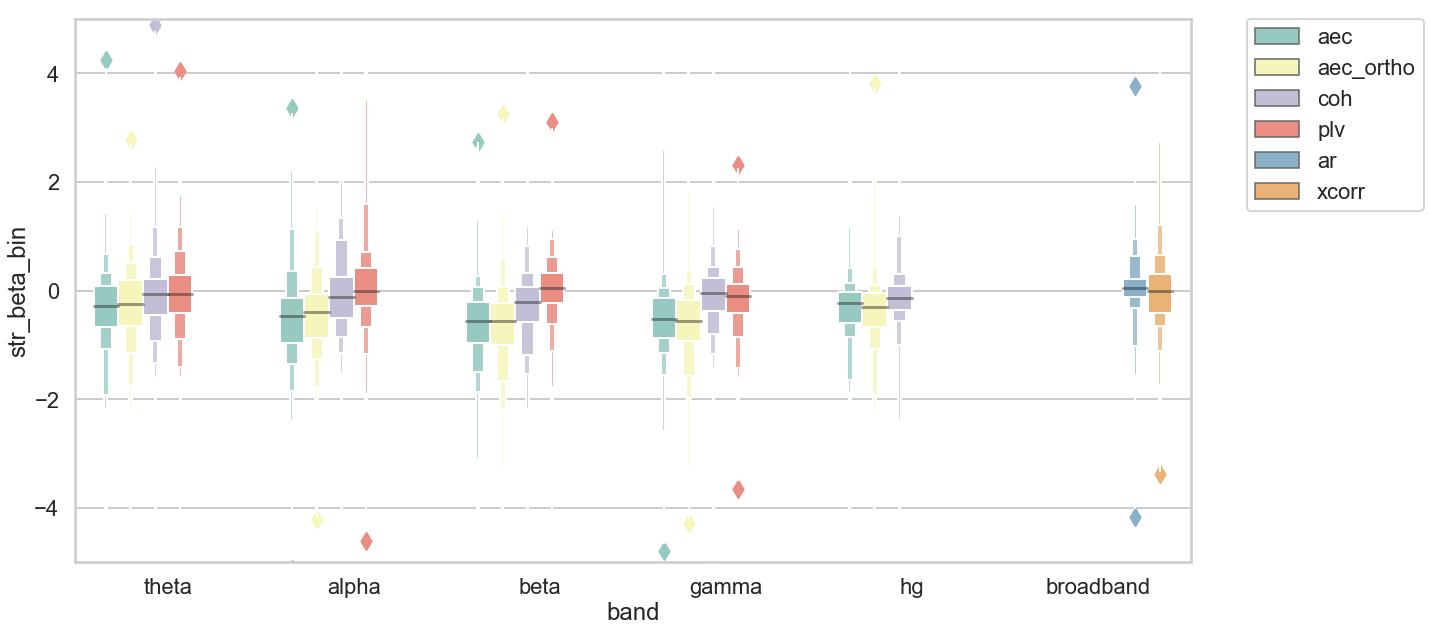

In [22]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set3')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_bin', hue='fc_measure', 
            order=['theta','alpha','beta','gamma','hg','broadband'])
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-5,5)
plt.savefig("../img/net_bin_str.eps")


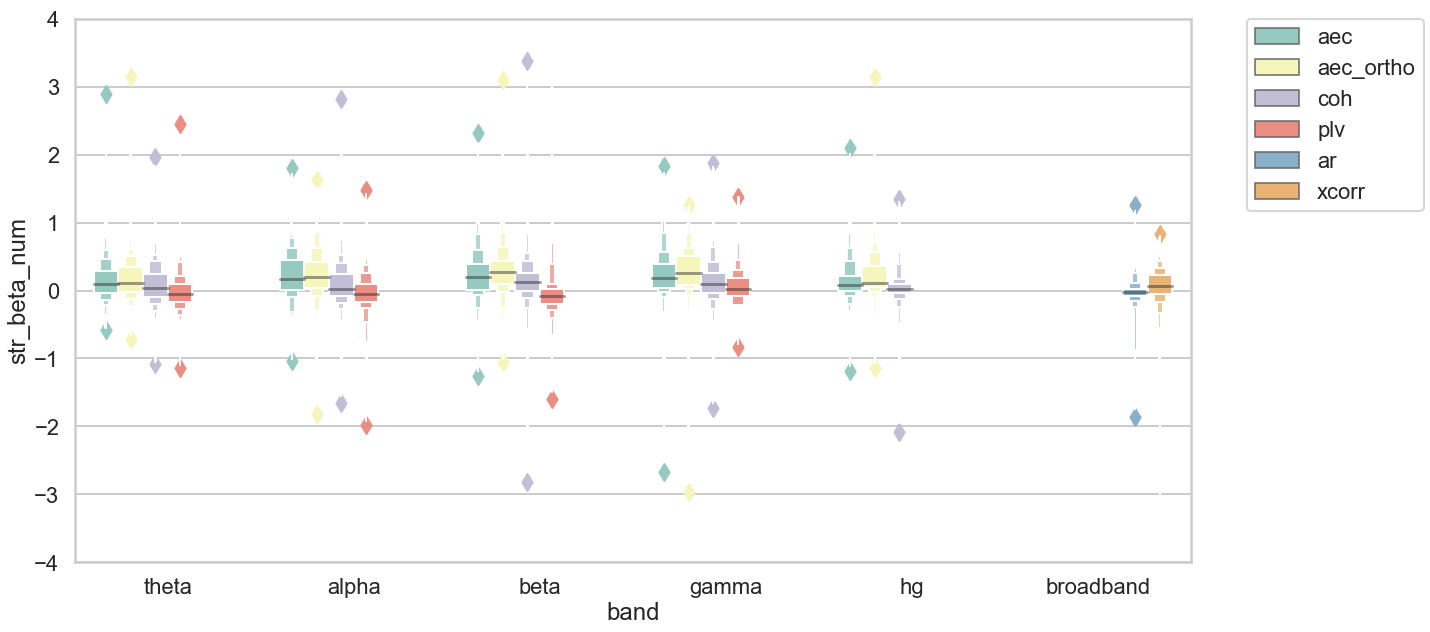

In [24]:
# color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_num', hue='fc_measure',
           order=['theta','alpha','beta','gamma','hg','broadband'], palette="Set3")
#sns.stripplot( data=net_data, x="band", y='str_beta_num',hue='fc_measure',color='black',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-4,4)
plt.savefig("../img/net_num_str.eps")

Is it different within or outside of the SOZ?

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


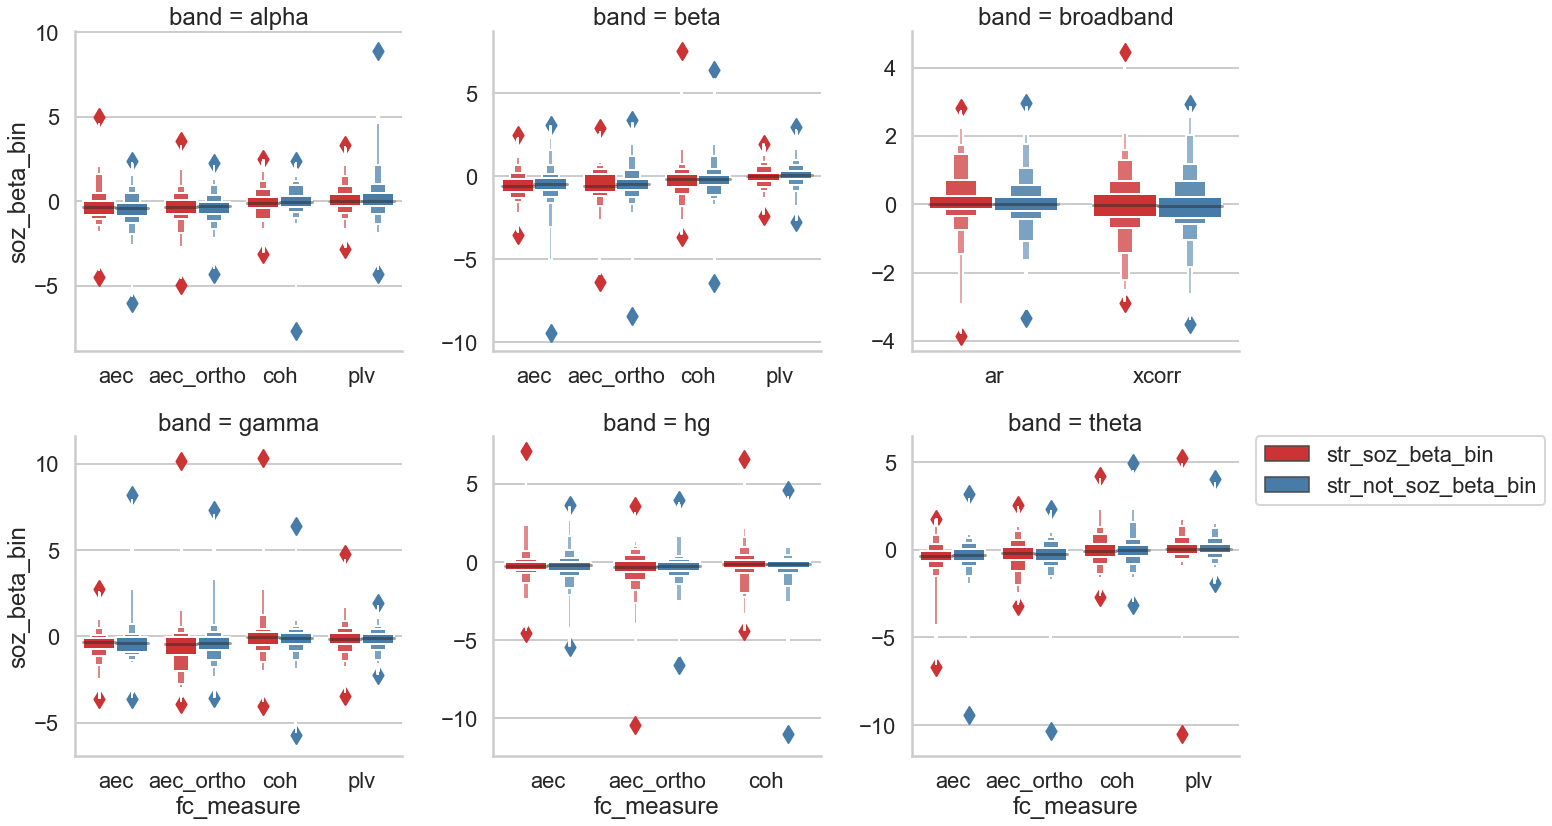

In [25]:
# reshape data
soz_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                           value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                           var_name ='SOZ', value_name ='soz_beta_bin')  

#color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette("Set1")
    
g = sns.FacetGrid(data=soz_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=6)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_bin', 'SOZ', palette = "Set1", hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_bin', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_soz_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


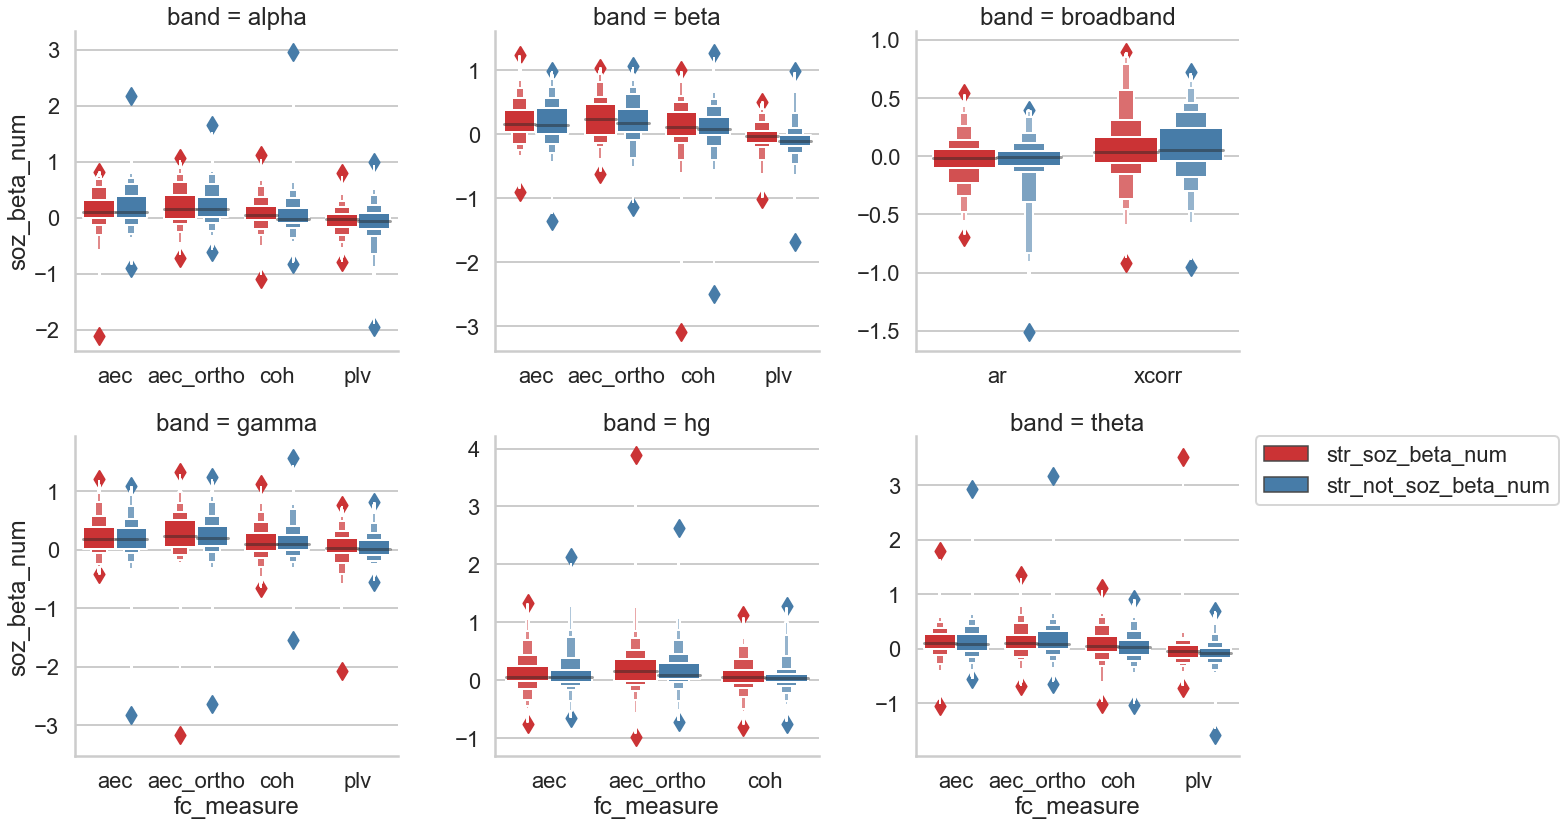

In [26]:
# reshape data
soz_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  var_name ='SOZ', value_name ='soz_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=soz_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=6)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_num', 'SOZ', palette = "Set1", hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_num', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

In [27]:
# save
# reformat before merge
soz_net_data_bin['SOZ'].replace('str_soz_beta_bin','within', inplace=True)
soz_net_data_bin['SOZ'].replace('str_not_soz_beta_bin','outside', inplace=True)
soz_net_data_num['SOZ'].replace('str_soz_beta_num','within', inplace=True)
soz_net_data_num['SOZ'].replace('str_not_soz_beta_num','outside', inplace=True)
soz_net_data = pd.merge(soz_net_data_bin, soz_net_data_num, on=['band', 'fc_measure', 'subj', 'SOZ', 'hand','race','gender','age'])
soz_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_soz_data_clean.csv')

Repeat for spikes

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


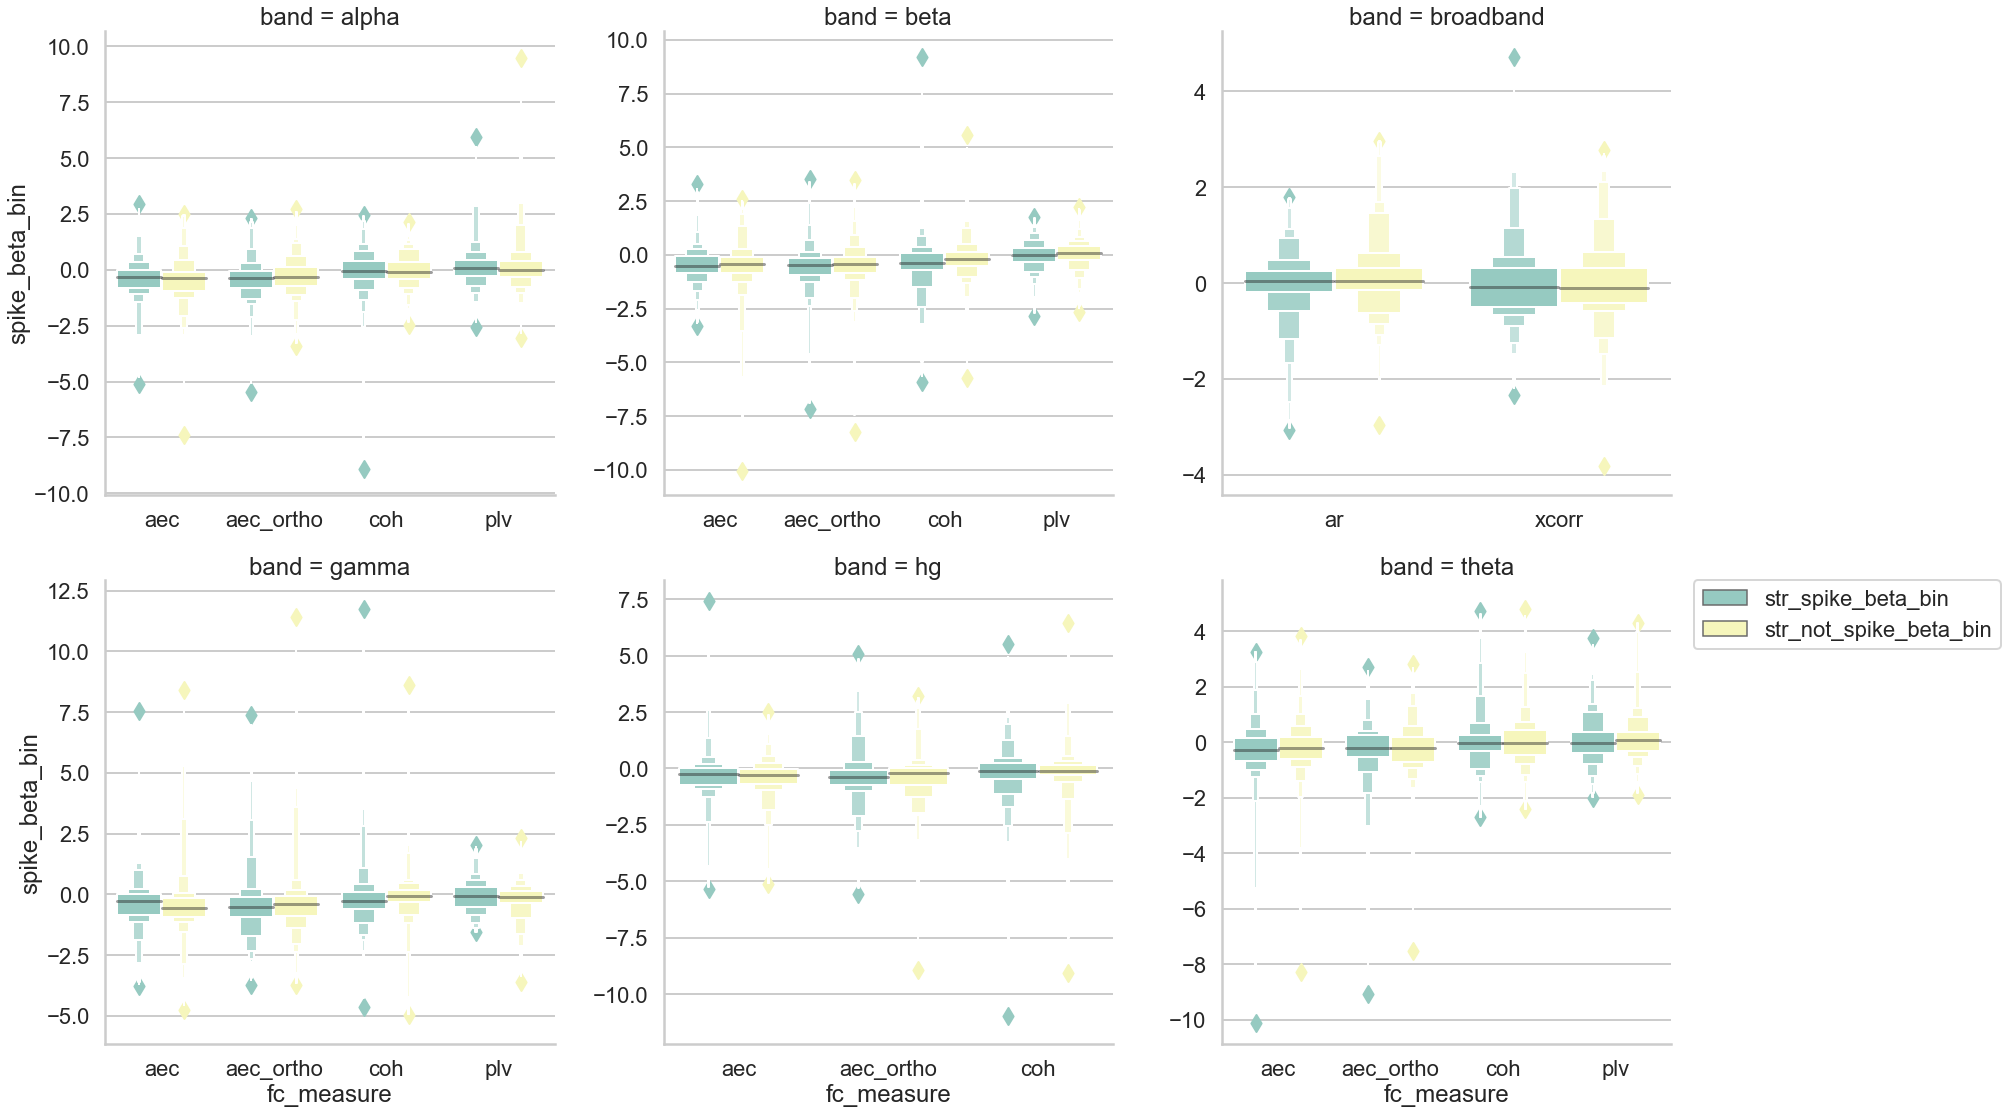

In [28]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_bin','str_not_spike_beta_bin'],  
                             var_name ='spike', value_name ='spike_beta_bin')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
g = sns.FacetGrid(data=spike_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_bin', 'spike', palette = "Set3", hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_bin', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
#    plt.setp(ax.lines, color=".9")
    
g.savefig("../img/net_spike_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


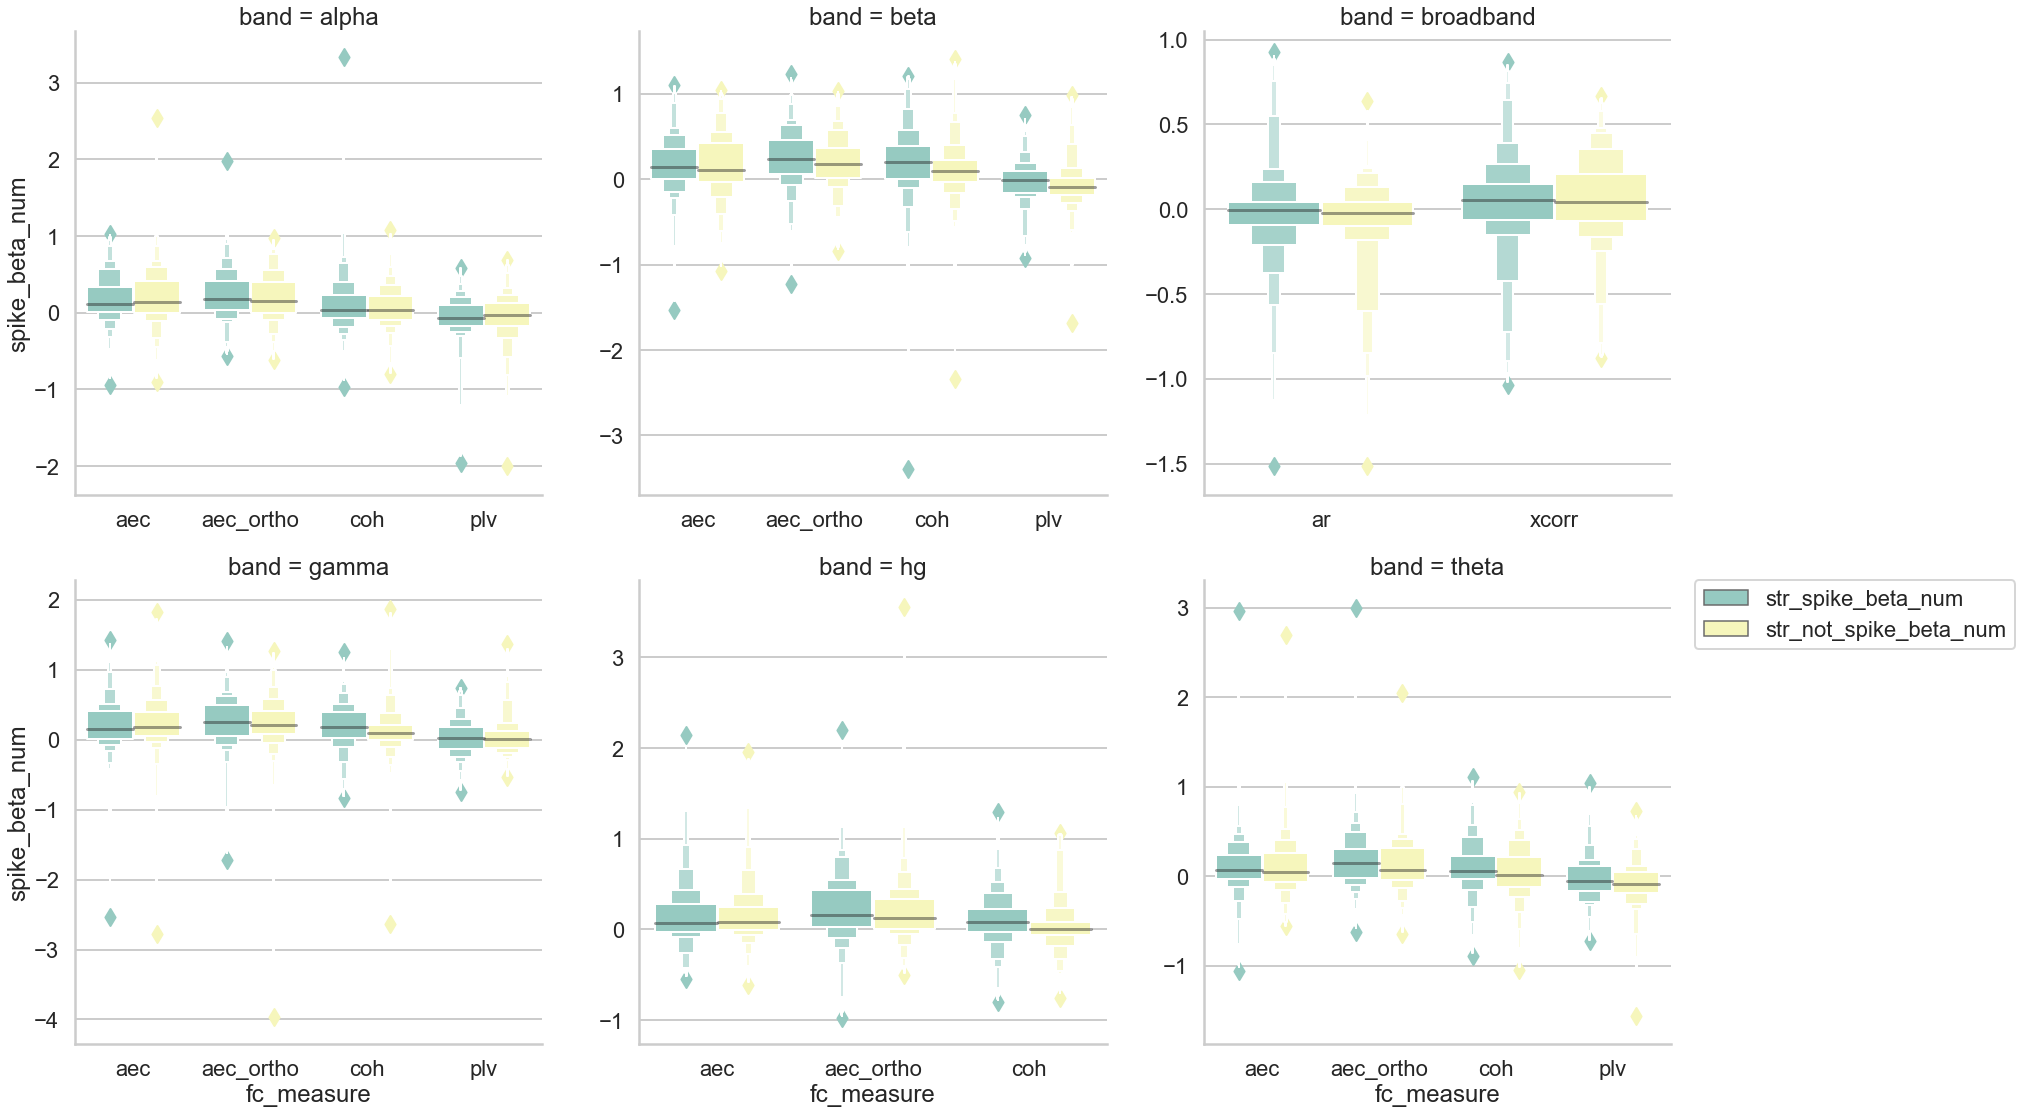

In [29]:
# reshape data
spike_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_num','str_not_spike_beta_num'],  
                             var_name ='spike', value_name ='spike_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=spike_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_num', 'spike', palette = "Set3", hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_spike_num.eps")

In [30]:
# save
# reformat before merge
spike_net_data_bin['spike'].replace('str_spike_beta_bin','within', inplace=True)
spike_net_data_bin['spike'].replace('str_not_spike_beta_bin','outside', inplace=True)
spike_net_data_num['spike'].replace('str_spike_beta_num','within', inplace=True)
spike_net_data_num['spike'].replace('str_not_spike_beta_num','outside', inplace=True)
spike_net_data = pd.merge(spike_net_data_bin, spike_net_data_num, on=['band', 'fc_measure', 'subj', 'spike', 'hand','race','gender','age'])
spike_net_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_spike_data_clean.csv')

## Effects on Node Measures

relationship between the number of spikes seen in that node, and the beta value

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


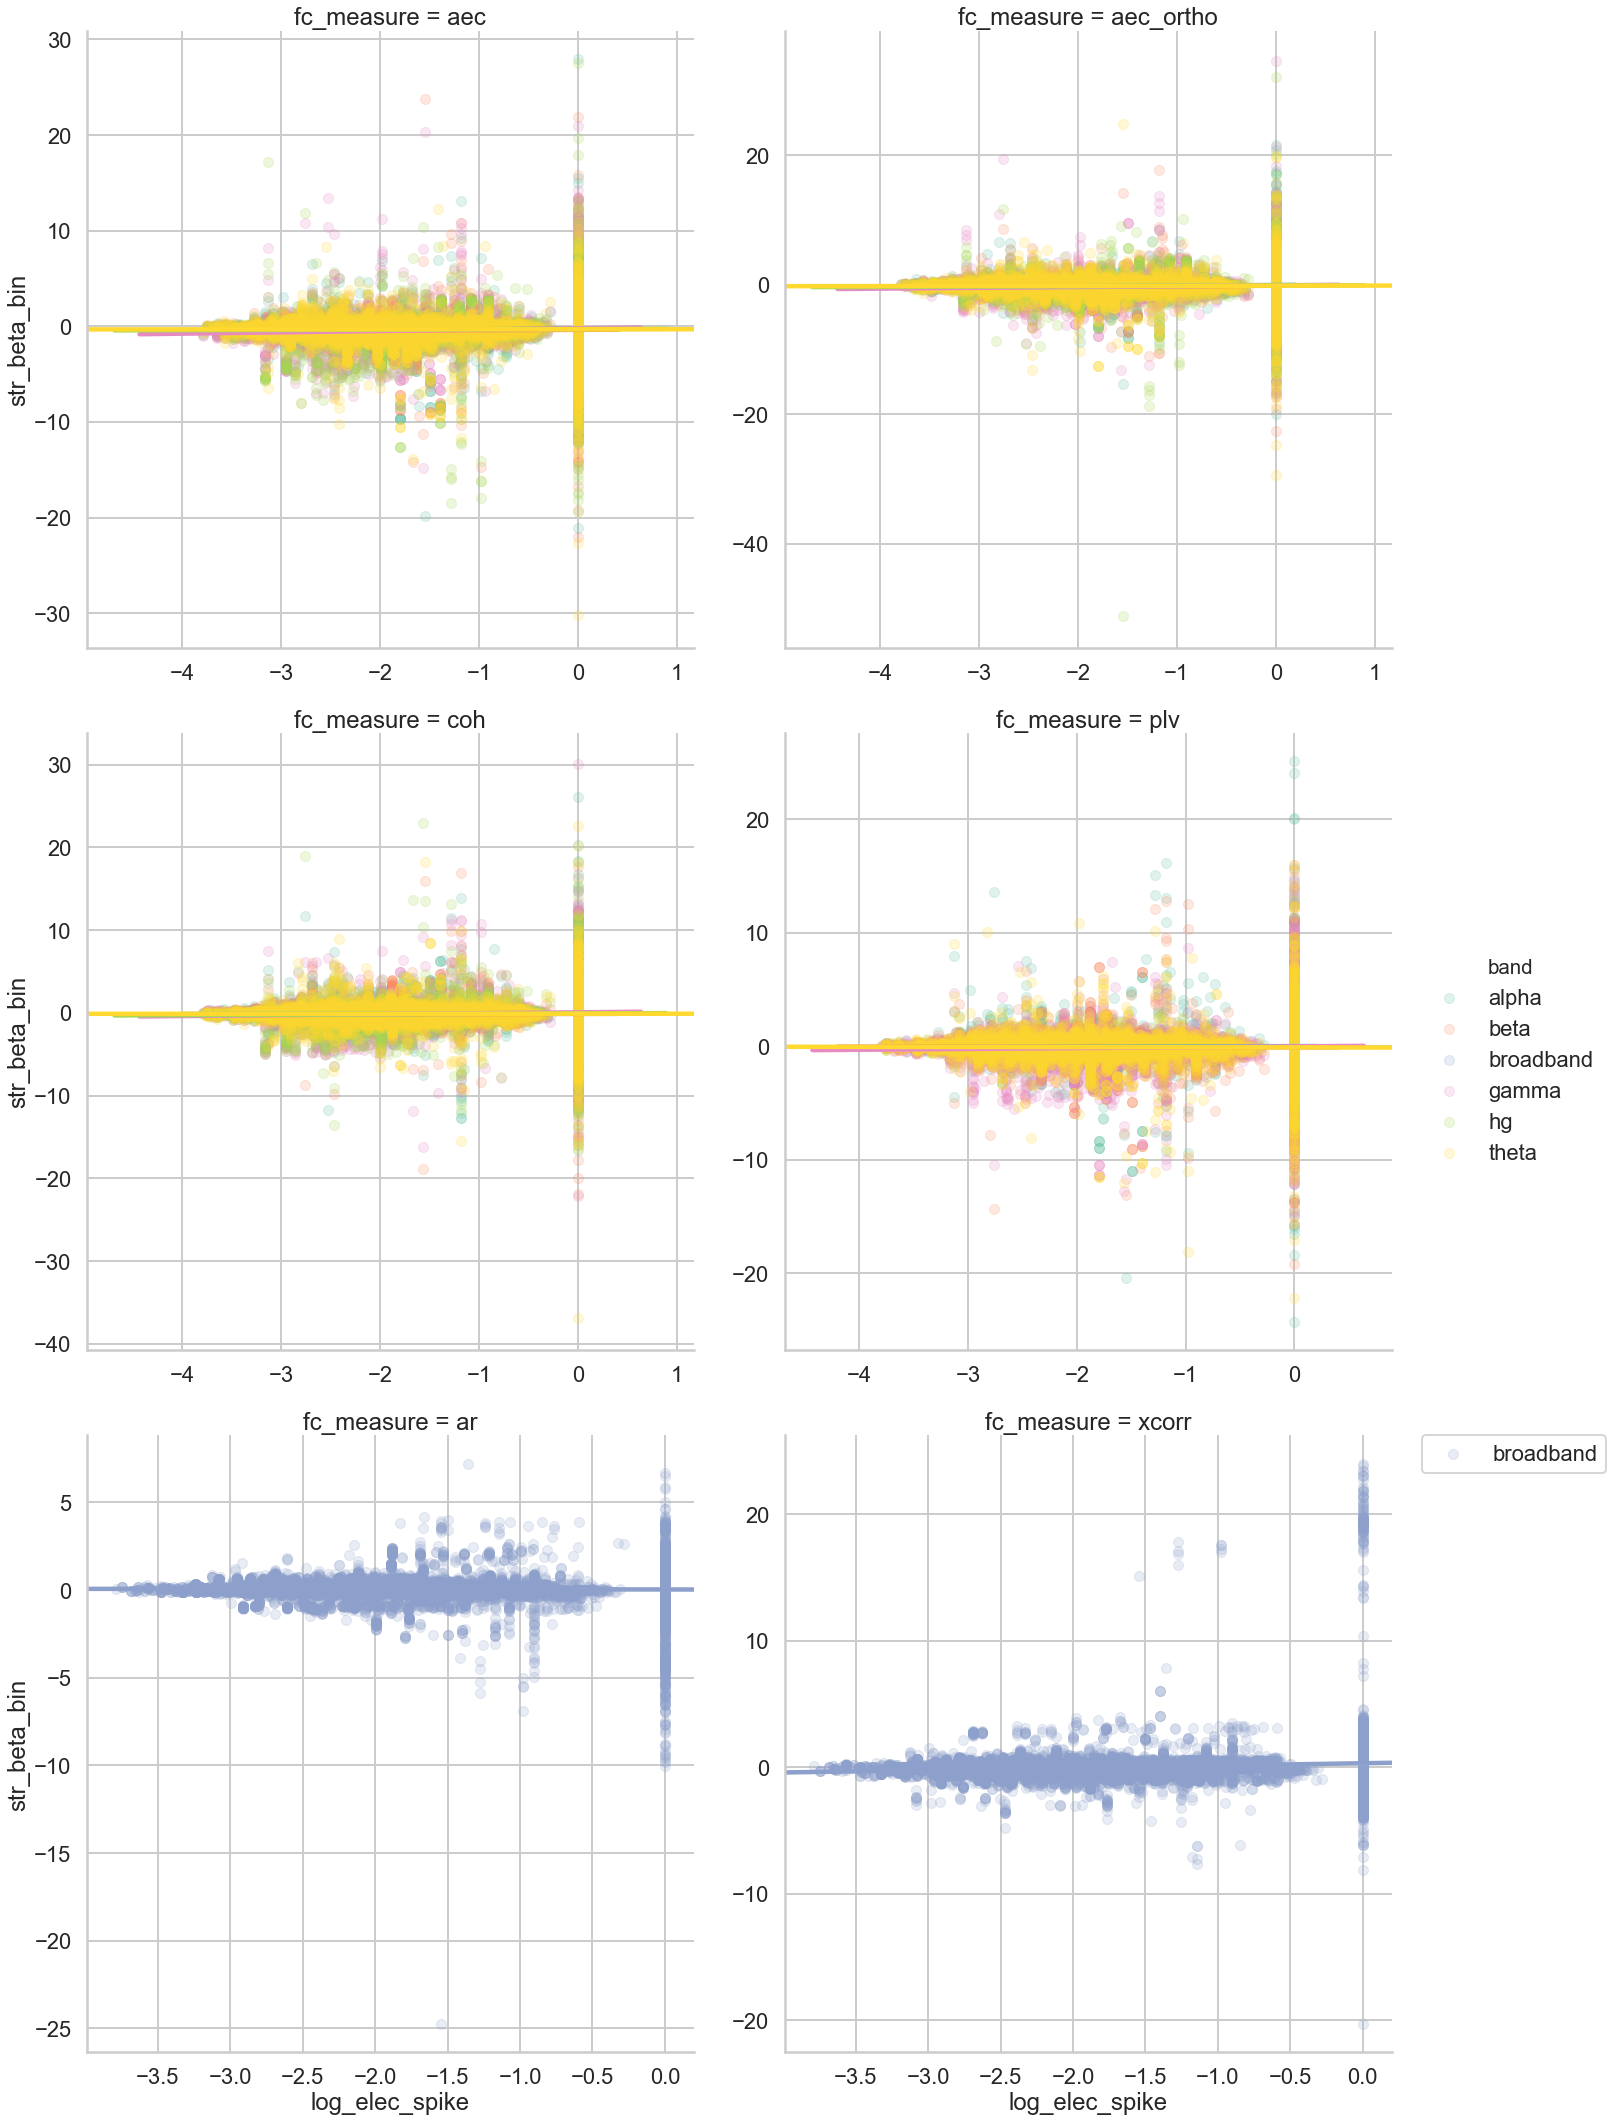

In [31]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


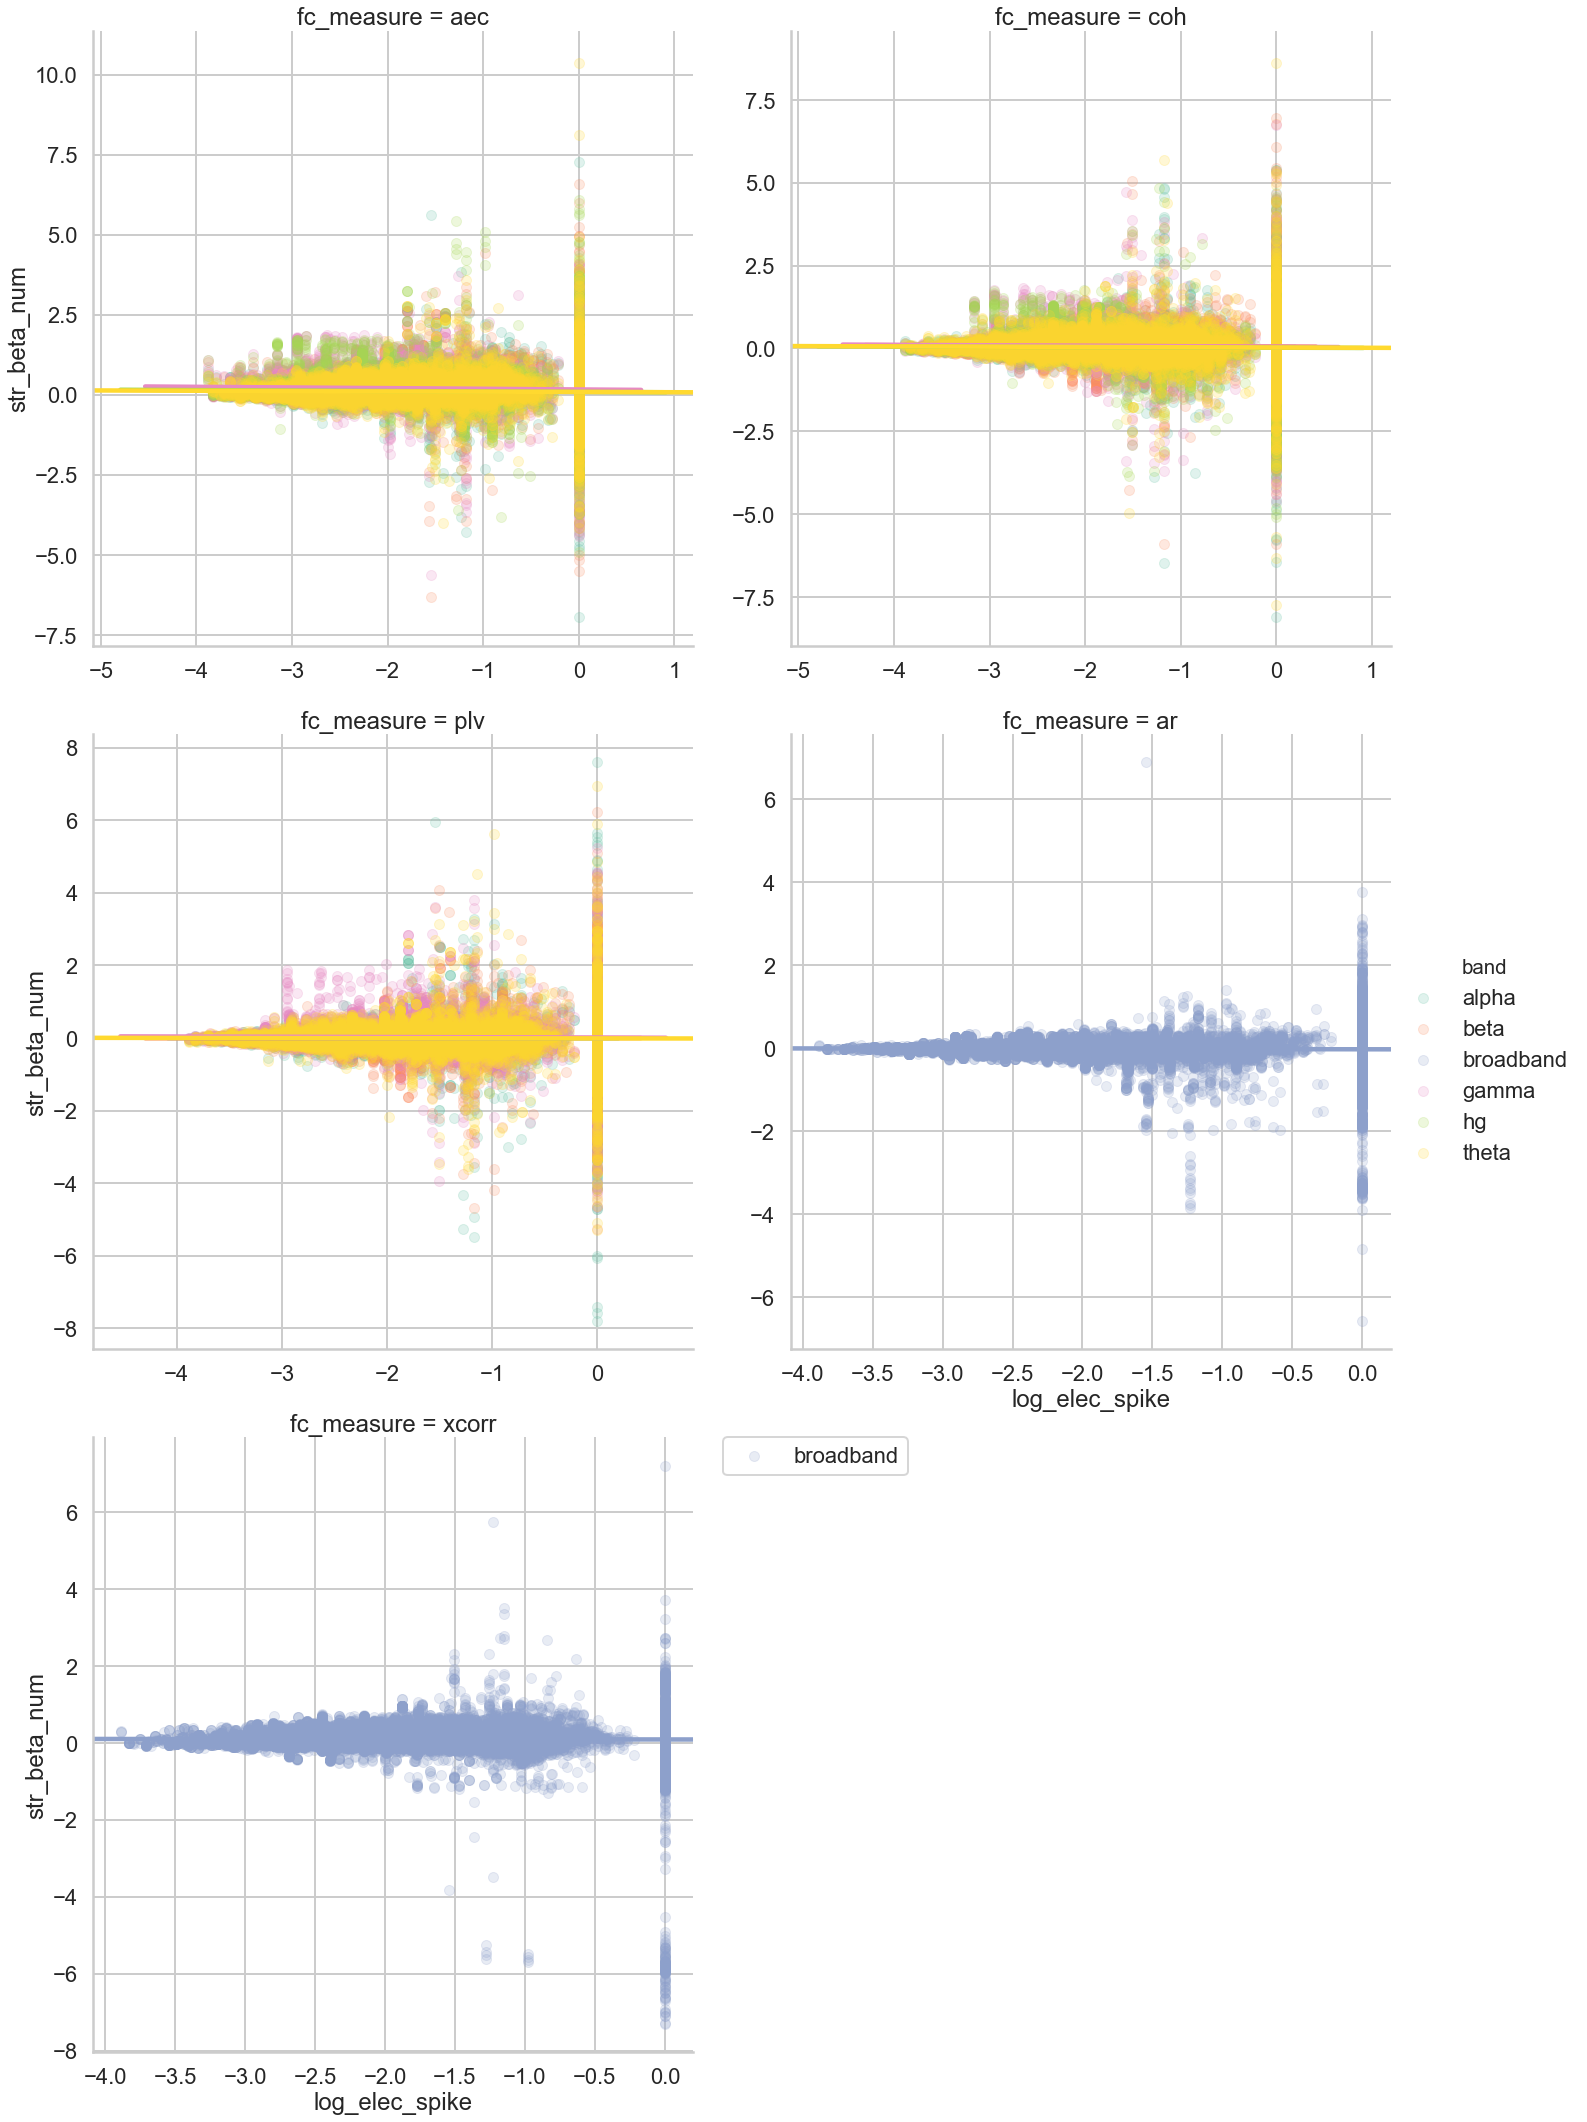

In [227]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, robust=True, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

Total strength

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


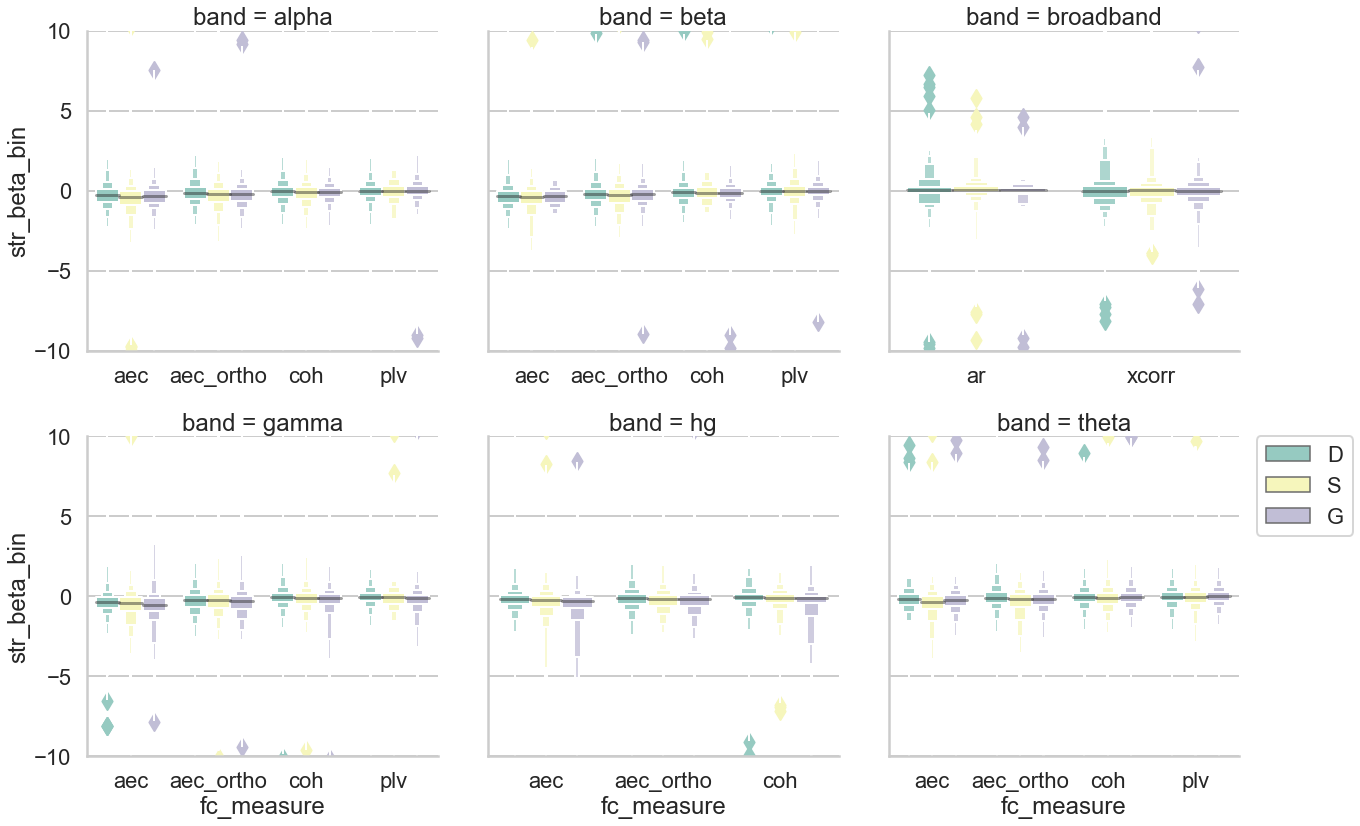

In [32]:
# grand teton natl park color pallette
#colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='band', col_wrap = 3, 
                  sharex=False, legend_out=True, size=6)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'type', palette = 'Set3', hue_order = ['D','S','G'])

g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
for ax in g.axes:
    ax.set_ylim(-10,10)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


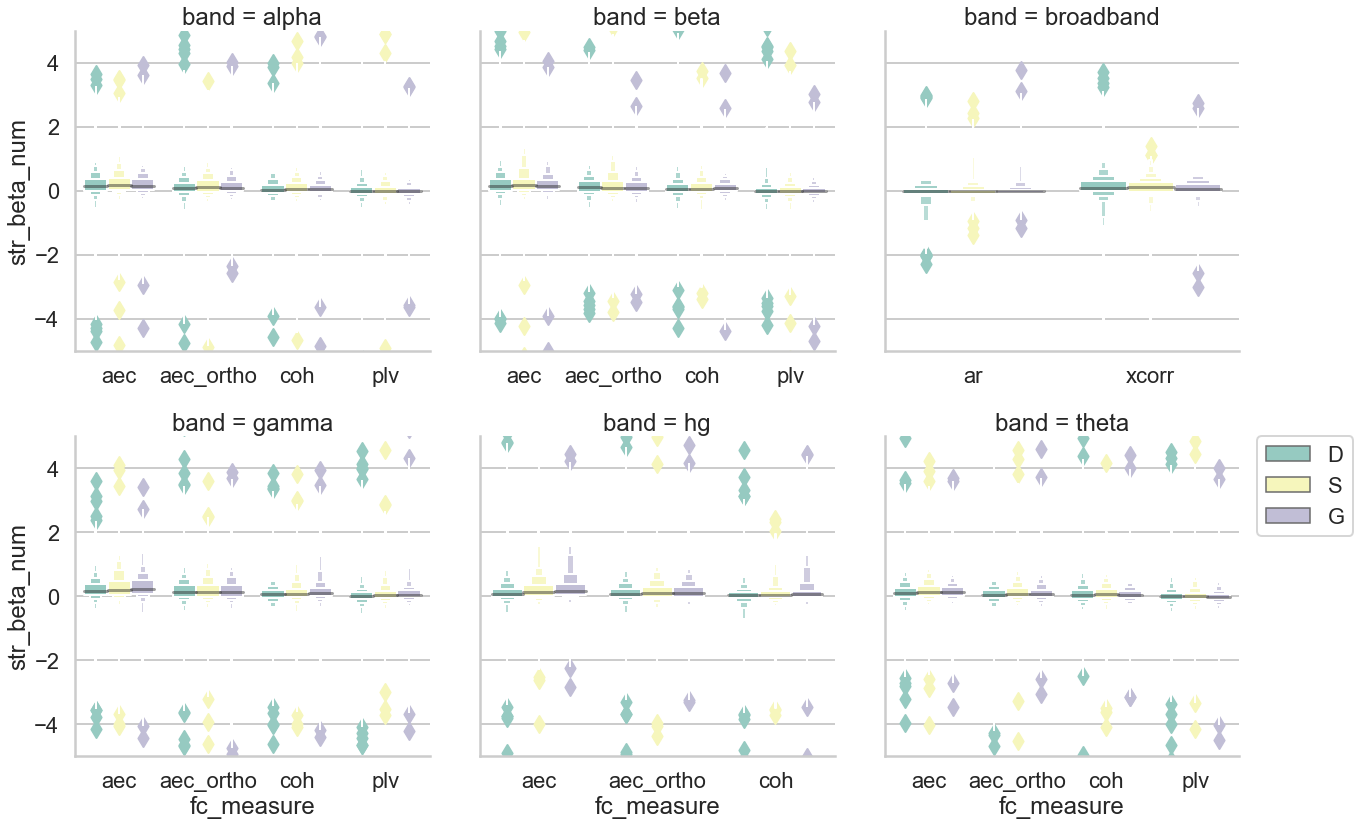

In [33]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='band', col_wrap = 3, 
                  sharex=False, legend_out=True, size=6)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'type', palette = 'Set3', hue_order = ['D','S','G'])

g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
for ax in g.axes:
    ax.set_ylim(-5,5)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


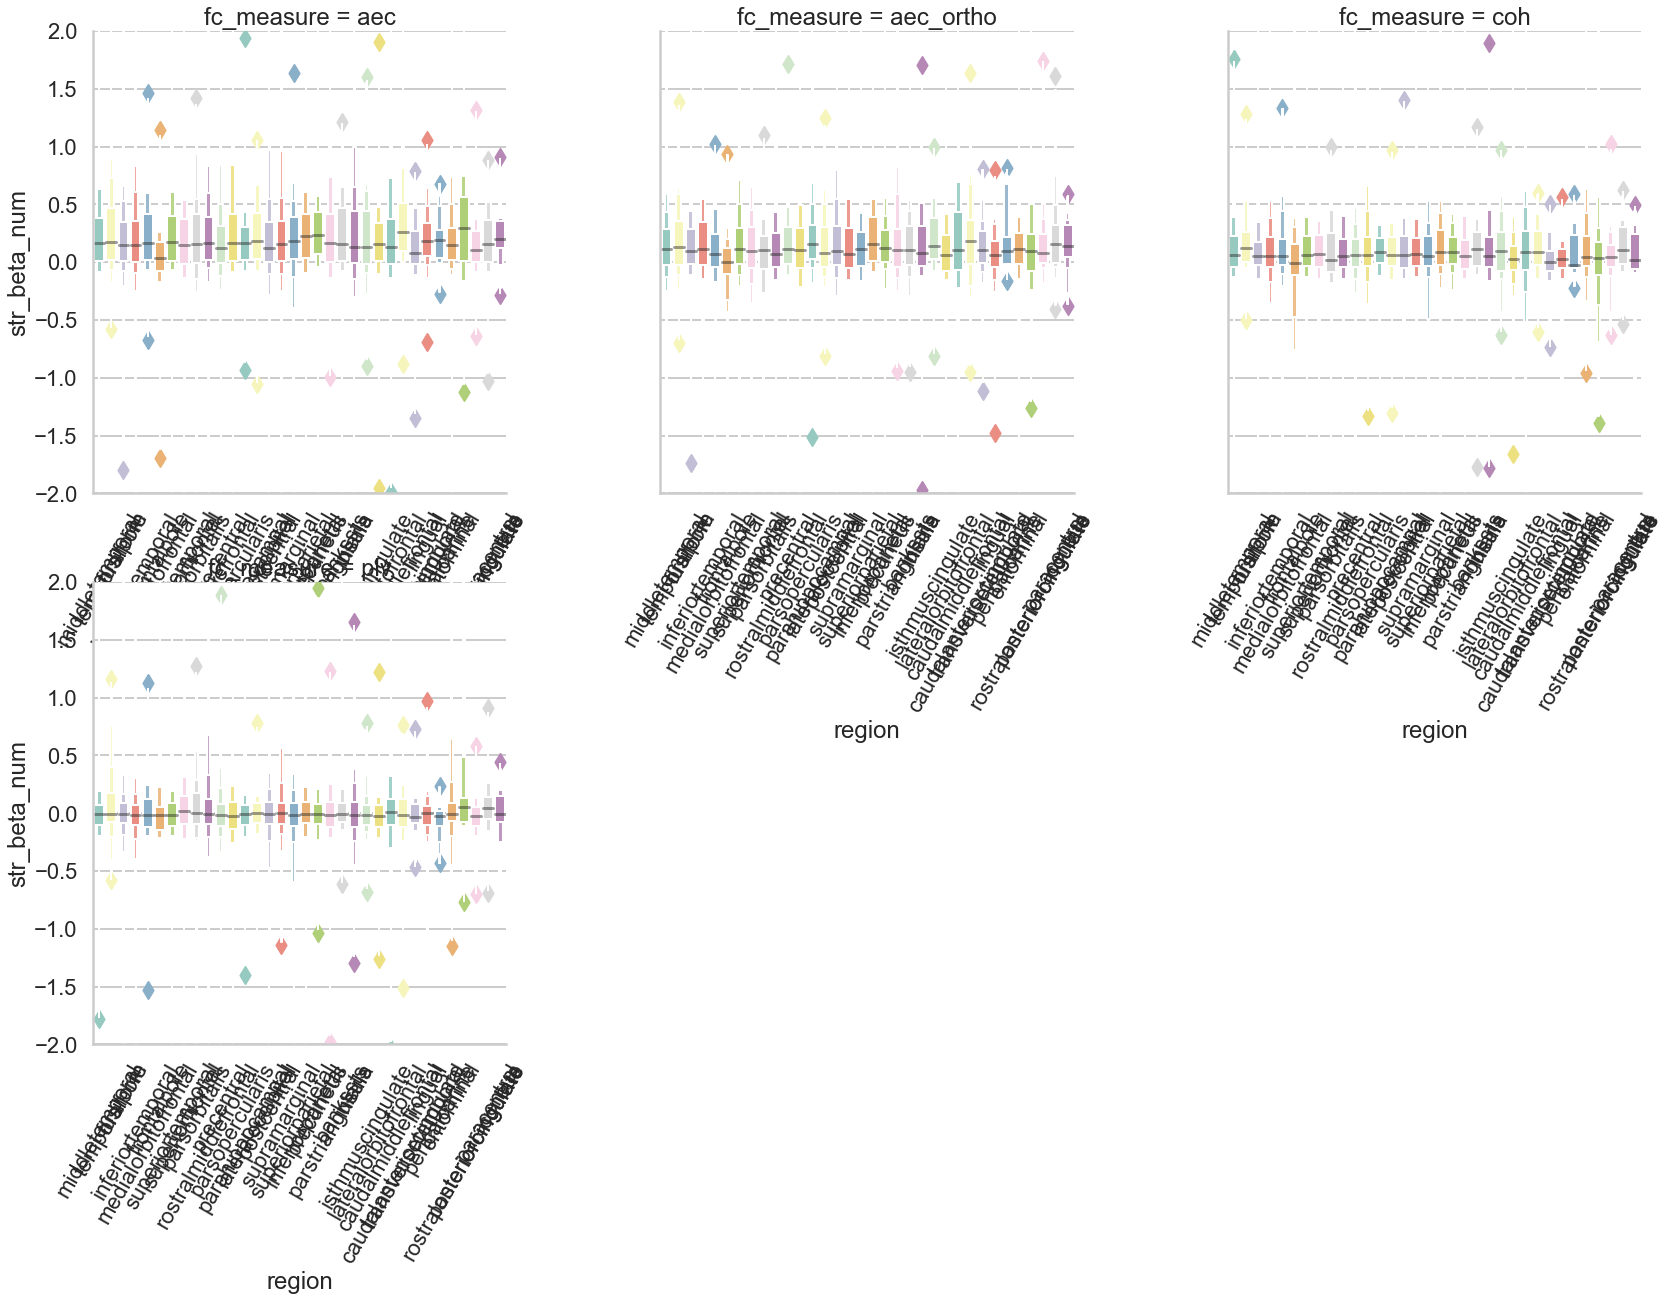

In [35]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data[node_data['band'] == 'beta'], col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, size=8)
g.map(sns.boxenplot, 'region', 'str_beta_num', palette = 'Set3')

for ax in g.axes:
    ax.set_ylim(-2,2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

### Categorize SOZ

In [36]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [37]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


subj locus
0  R1175N   amb
1  R1170J   tle
2  R1166D   amb
3  R1161E   amb
4  R1124J   tle

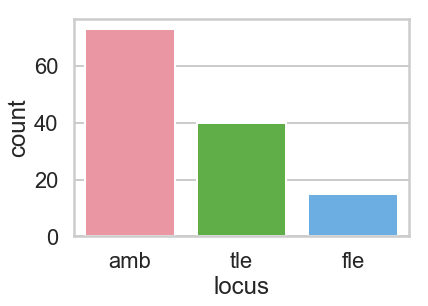

In [38]:
sns.countplot(data=epilepsy_type, x='locus')

In [39]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.head()

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
0        alpha_aec   430     -0.381462      0.475069         -0.479936   
1  alpha_aec_ortho   430     -0.232843      0.414085         -0.200678   
2        alpha_coh   430     -0.377510      0.441747         -0.368589   
3        alpha_plv   430     -0.456733      0.413028         -0.517453   
4         beta_aec   430     -0.591918      0.545076         -0.733584   

   str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
0          0.474653              0.475251            0.471236   
1          0.412866              0.408954            0.308307   
2          0.476458              0.434604            0.312499   
3          0.434959              0.400411            0.288097   
4          0.613832              0.545029            0.516449   

   str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
0             -0.377808           -0.375538               -0.387141   
1             -0.232903           -0.027842               -0.272014   
2             -0.370379           -0.173272               -0.410711   
3             -0.440434           -0.282706               -0.482510   
4             -0.589184           -0.499192               -0.610455   

  fc_measure  str_not_spike_beta_num   band    subj hand   age gender  race  \
0        aec                0.480301  alpha  R1175N    R  34.0      M   1.0   
1  aec_ortho                0.436273  alpha  R1175N    R  34.0      M   1.0   
2        coh                0.459005  alpha  R1175N    R  34.0      M   1.0   
3        plv                0.429426  alpha  R1175N    R  34.0      M   1.0   
4        aec                0.553404   beta  R1175N    R  34.0      M   1.0   

  locus  
0   amb  
1   amb  
2   amb  
3   amb  
4   amb

In [40]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288876 entries, 0 to 288875
Data columns (total 29 columns):
elec                      288876 non-null object
band_measure              288876 non-null object
n_tp                      288876 non-null int64
elec_spike                288876 non-null float64
elec_in_soz               288876 non-null int64
str_soz_beta_bin          191751 non-null float64
str_not_soz_beta_bin      177069 non-null float64
str_spike_beta_bin        173838 non-null float64
str_not_spike_beta_bin    155270 non-null float64
str_beta_bin              280917 non-null float64
str_soz_beta_num          191751 non-null float64
str_not_soz_beta_num      177069 non-null float64
str_spike_beta_num        173838 non-null float64
str_beta_num              280917 non-null float64
str_not_spike_beta_num    155270 non-null float64
fc_measure                288876 non-null object
band                      288876 non-null object
region                    259056 non-null objec

## Net plots with category by locus

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


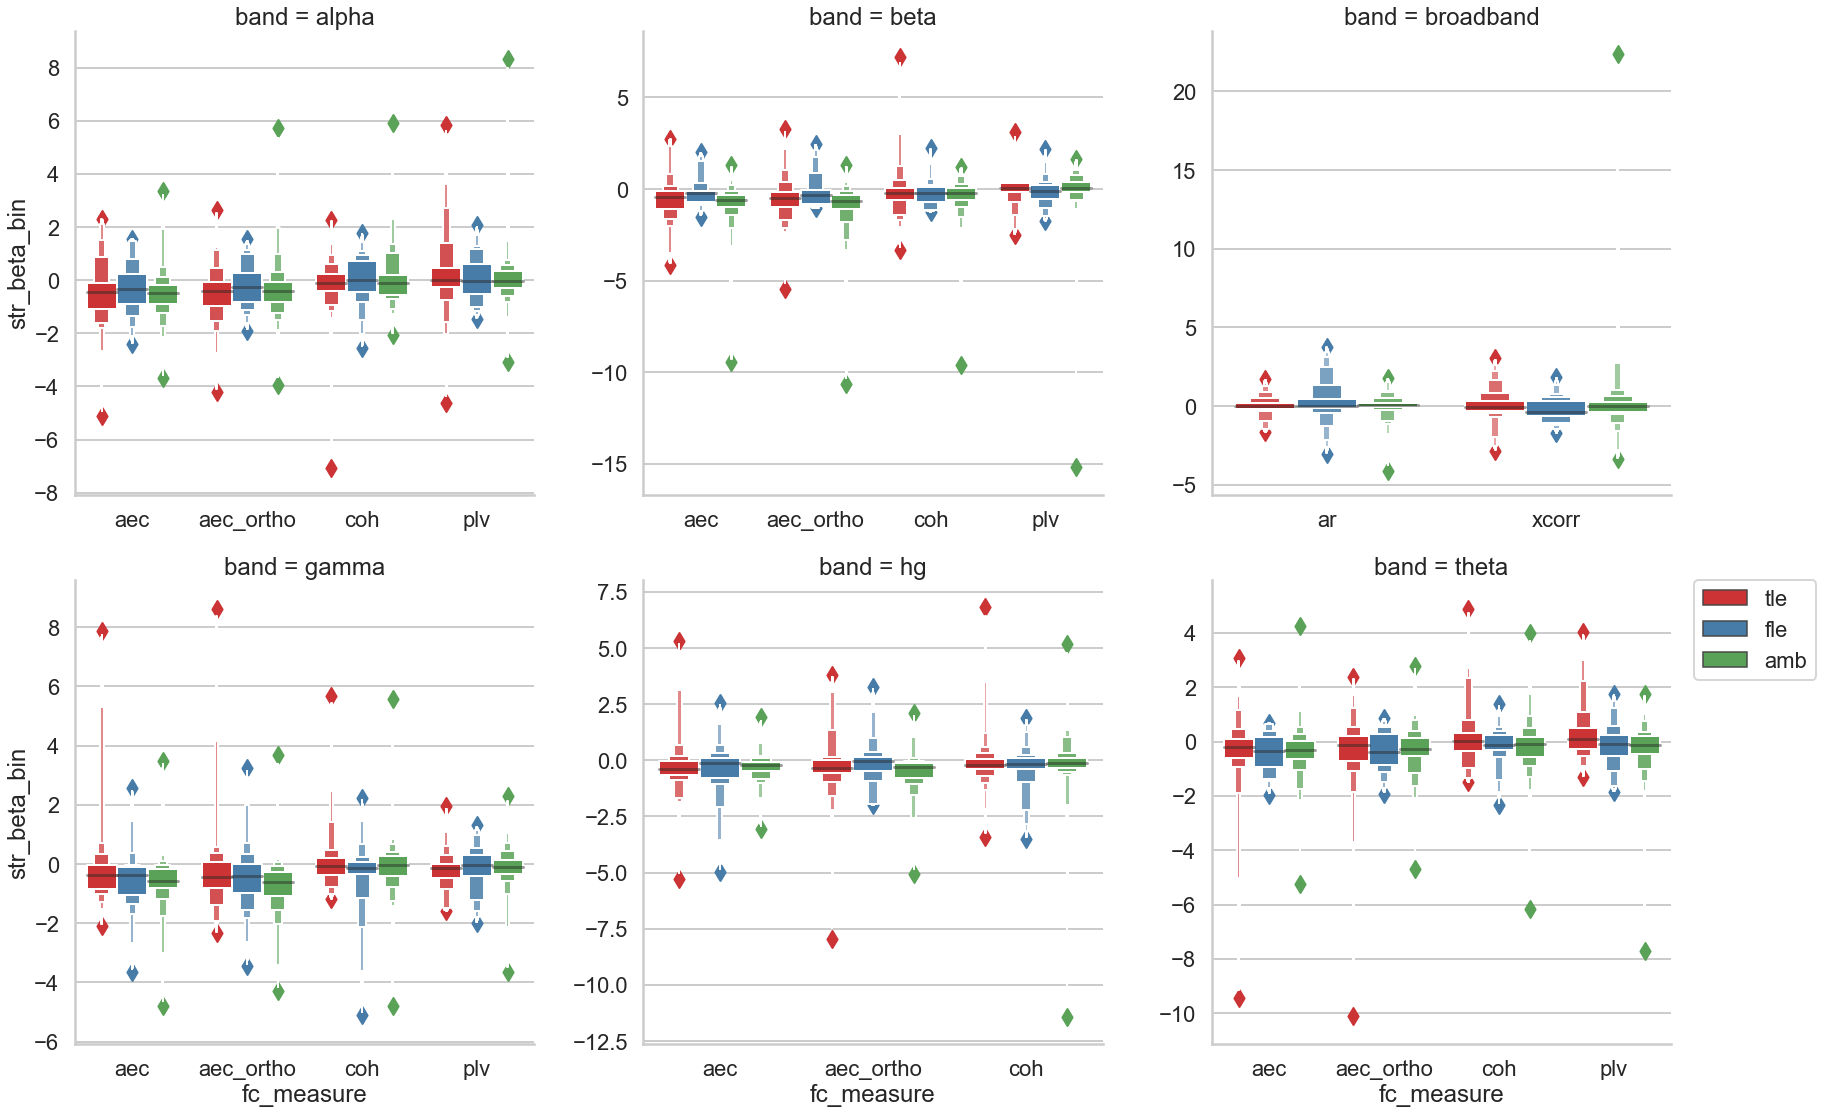

In [42]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
#g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    
#g.savefig("../img/net_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


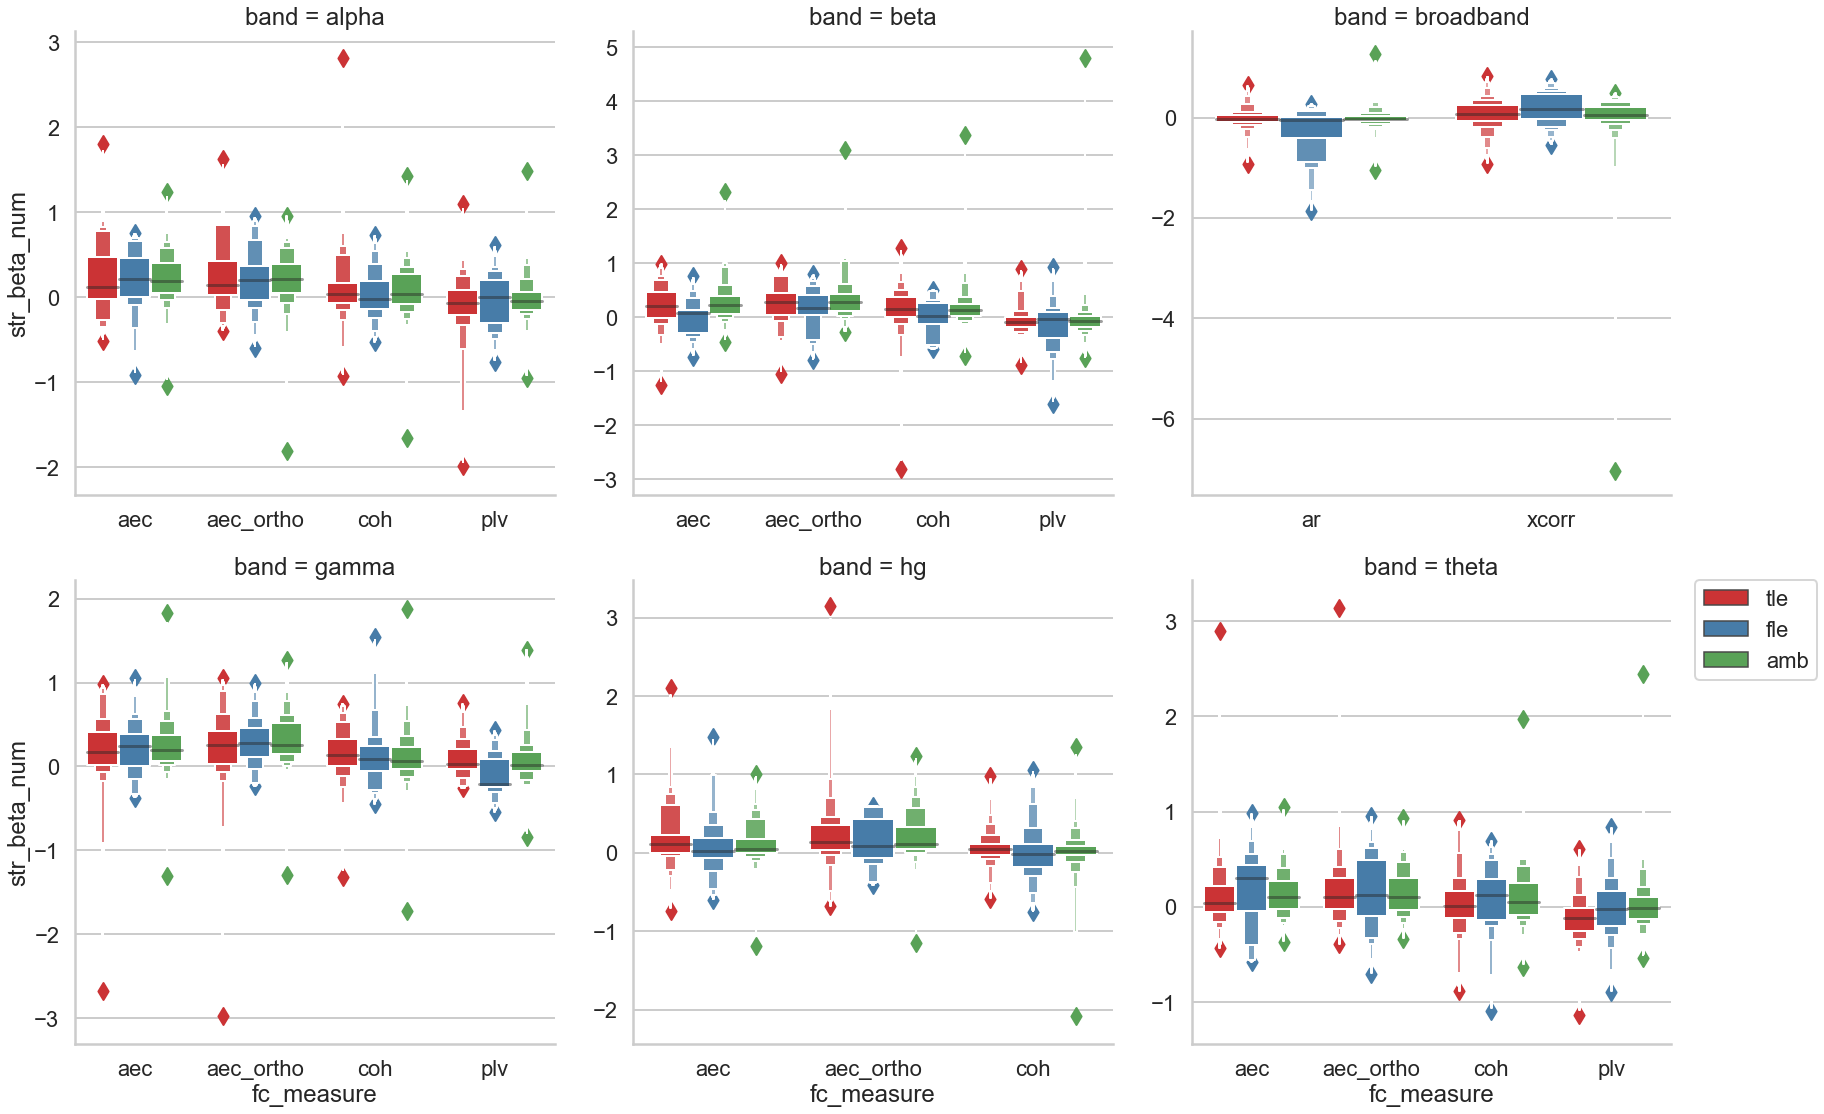

In [43]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

## Behavior

In [44]:
task_data = pd.read_csv(f'{RAM_dir}group_analysis/task_performance.csv', index_col=0)
task_data.reset_index(inplace=True)
task_data.head(10)

subj        YC  TH       PAL  catFR        FR
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573
1  R1002P       NaN NaN  0.492335    NaN  0.945857
2  R1003P       NaN NaN  0.083711    NaN  0.602817
3  R1004D       NaN NaN       NaN  0.625       NaN
4  R1006P  0.401778 NaN       NaN    NaN  0.779412
5  R1008J  0.530724 NaN       NaN    NaN       NaN
6  R1009W  0.183700 NaN       NaN    NaN       NaN
7  R1010J  0.358207 NaN       NaN    NaN  0.825373
8  R1013E  0.182021 NaN       NaN    NaN       NaN
9  R1014D  0.354468 NaN       NaN    NaN       NaN

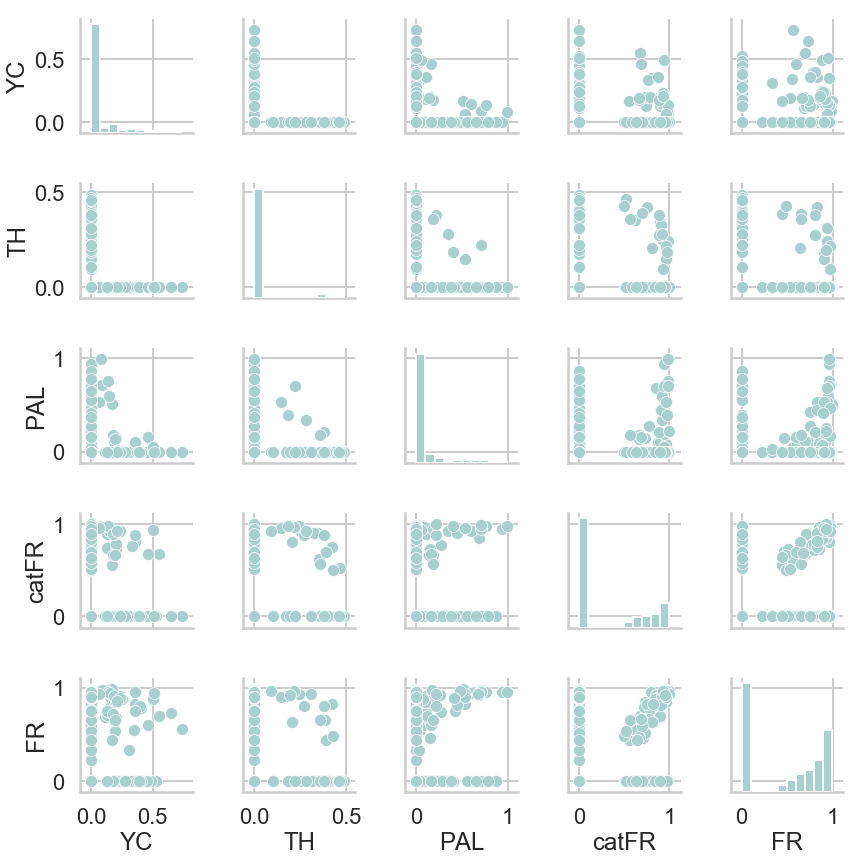

In [45]:
sns.pairplot(data=task_data.fillna(0), vars=['YC','TH','PAL','catFR','FR'])

In [46]:
# add averages over recal and nav tasks
task_data = task_data.assign(recall = task_data[['catFR','FR','PAL']].mean(axis=1, skipna=True))
task_data = task_data.assign(nav = task_data[['TH','YC']].mean(axis=1, skipna=True))
task_data = task_data.assign(avg = task_data[['nav','recall']].mean(axis=1, skipna=True))
task_data.head()

subj        YC  TH       PAL  catFR        FR    recall       nav  \
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573  0.293972  0.345526   
1  R1002P       NaN NaN  0.492335    NaN  0.945857  0.719096       NaN   
2  R1003P       NaN NaN  0.083711    NaN  0.602817  0.343264       NaN   
3  R1004D       NaN NaN       NaN  0.625       NaN  0.625000       NaN   
4  R1006P  0.401778 NaN       NaN    NaN  0.779412  0.779412  0.401778   

        avg  
0  0.319749  
1  0.719096  
2  0.343264  
3  0.625000  
4  0.590595

In [47]:
# merge with net_data
subj_idx = [x in net_data.subj.unique() for x in task_data.subj]
task_data = task_data[subj_idx]
net_task_data = pd.merge(net_data, task_data, on=['subj'])
net_task_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360 entries, 0 to 3359
Data columns (total 28 columns):
band_measure              3360 non-null object
n_tp                      3360 non-null int64
str_beta_bin              3297 non-null float64
str_beta_num              3297 non-null float64
str_soz_beta_bin          2247 non-null float64
str_soz_beta_num          2247 non-null float64
str_not_soz_beta_num      2239 non-null float64
str_spike_beta_num        1995 non-null float64
str_not_soz_beta_bin      2239 non-null float64
str_spike_beta_bin        1995 non-null float64
str_not_spike_beta_bin    1987 non-null float64
fc_measure                3360 non-null object
str_not_spike_beta_num    1987 non-null float64
band                      3360 non-null object
subj                      3360 non-null object
hand                      3360 non-null object
age                       3360 non-null float64
gender                    3360 non-null object
race                      3360 non-nu

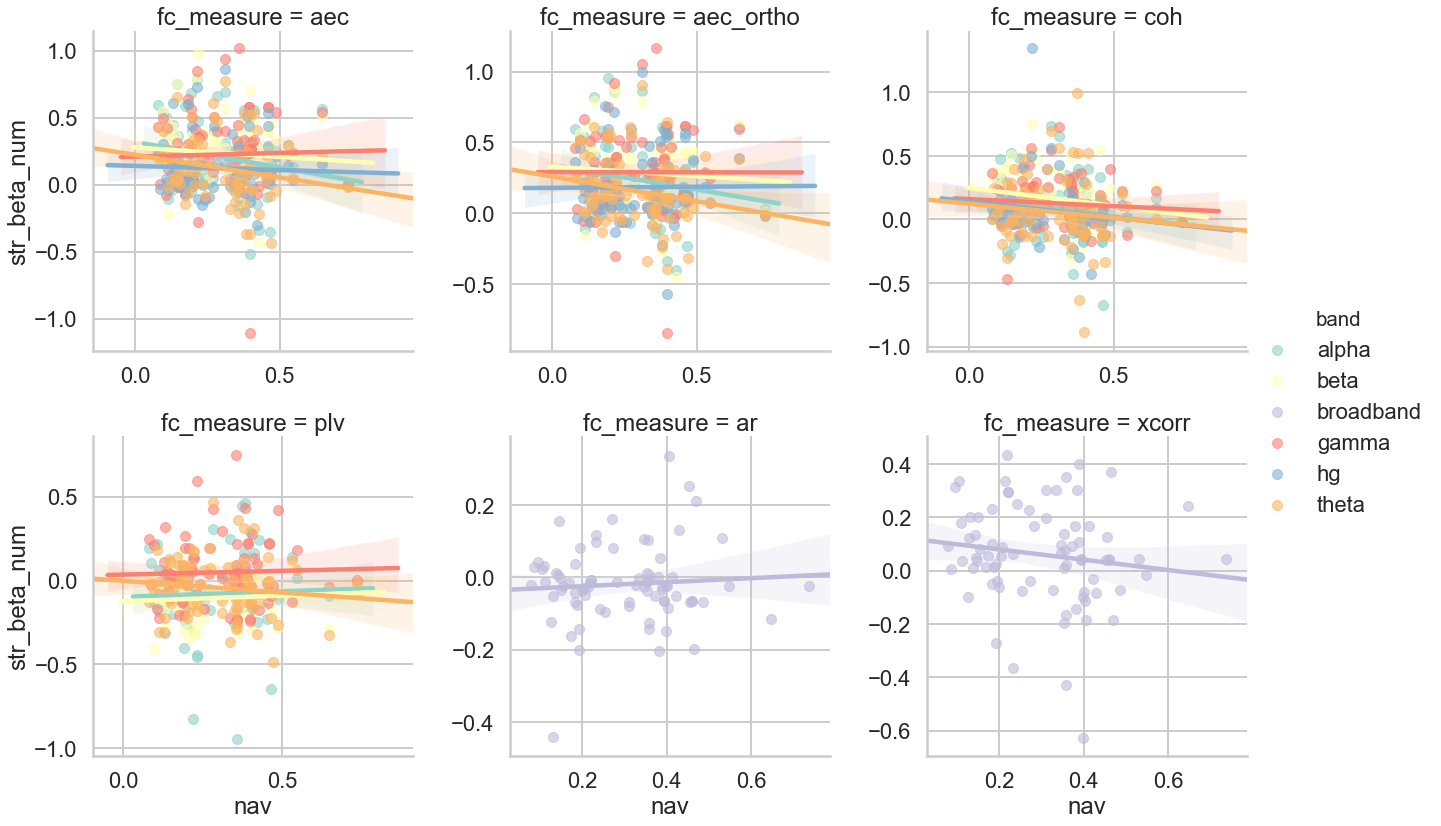

In [48]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

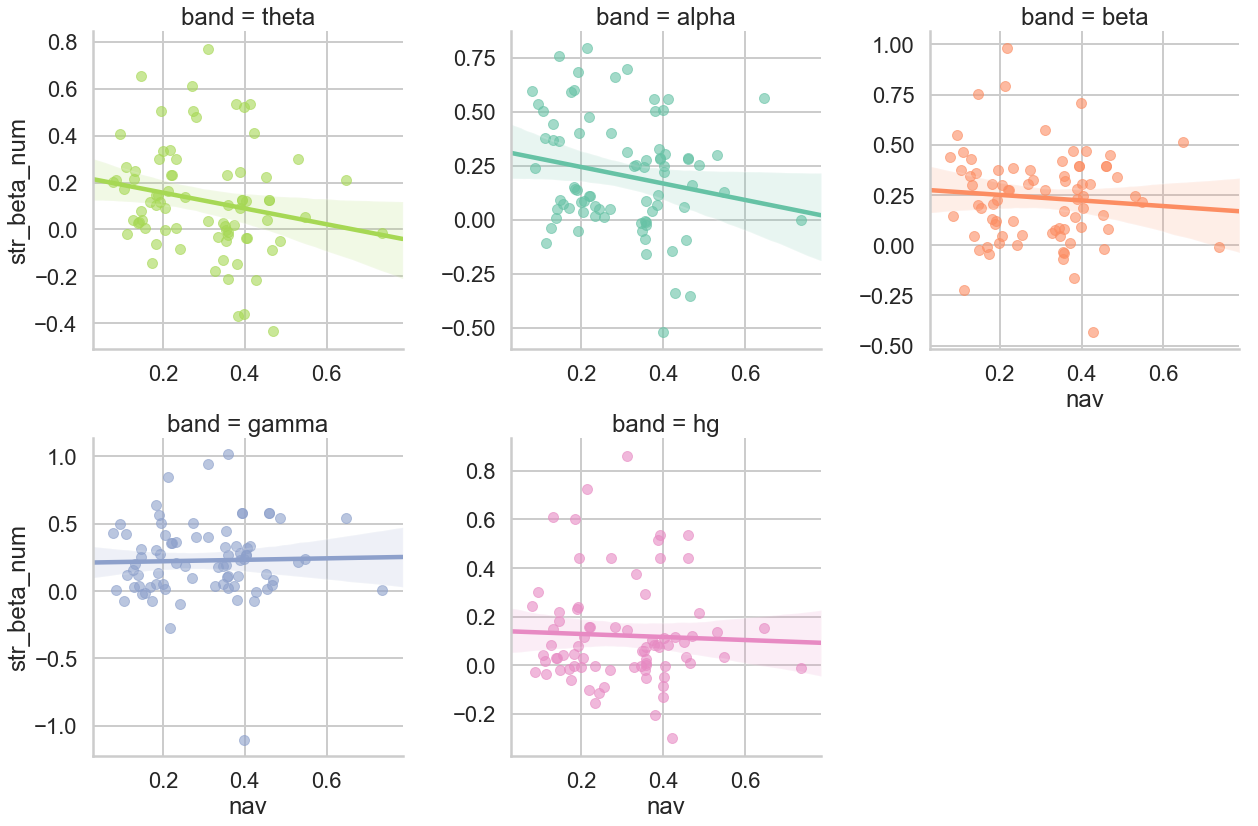

In [49]:
sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6}, col_order=['theta','alpha','beta','gamma','hg'])
plt.savefig("../img/task_perf_band.eps")

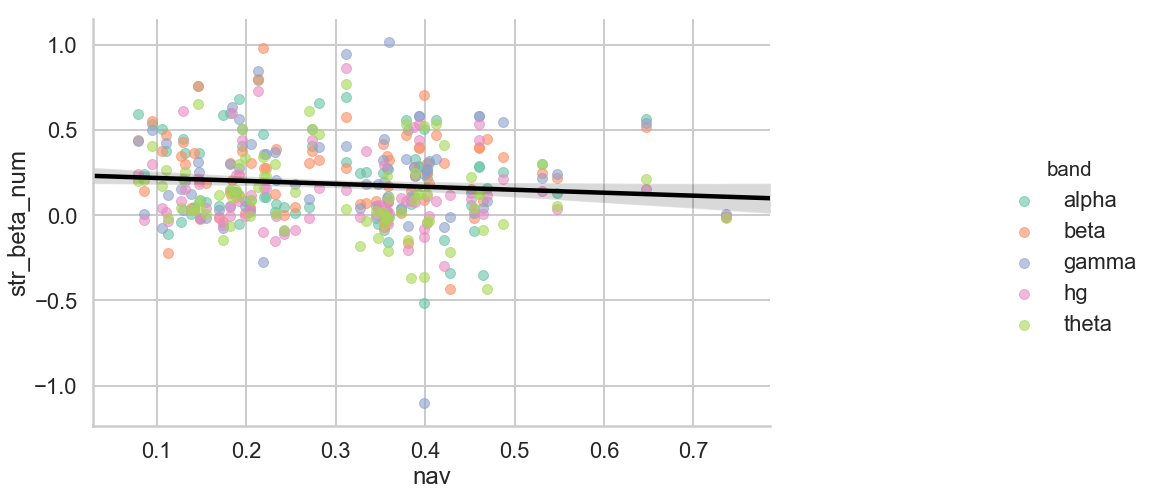

In [50]:
g = sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', fit_reg=False,
           height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})
sns.regplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', scatter=False, ax=g.axes[0,0], color='black')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.savefig("../img/task_perf_band.eps")

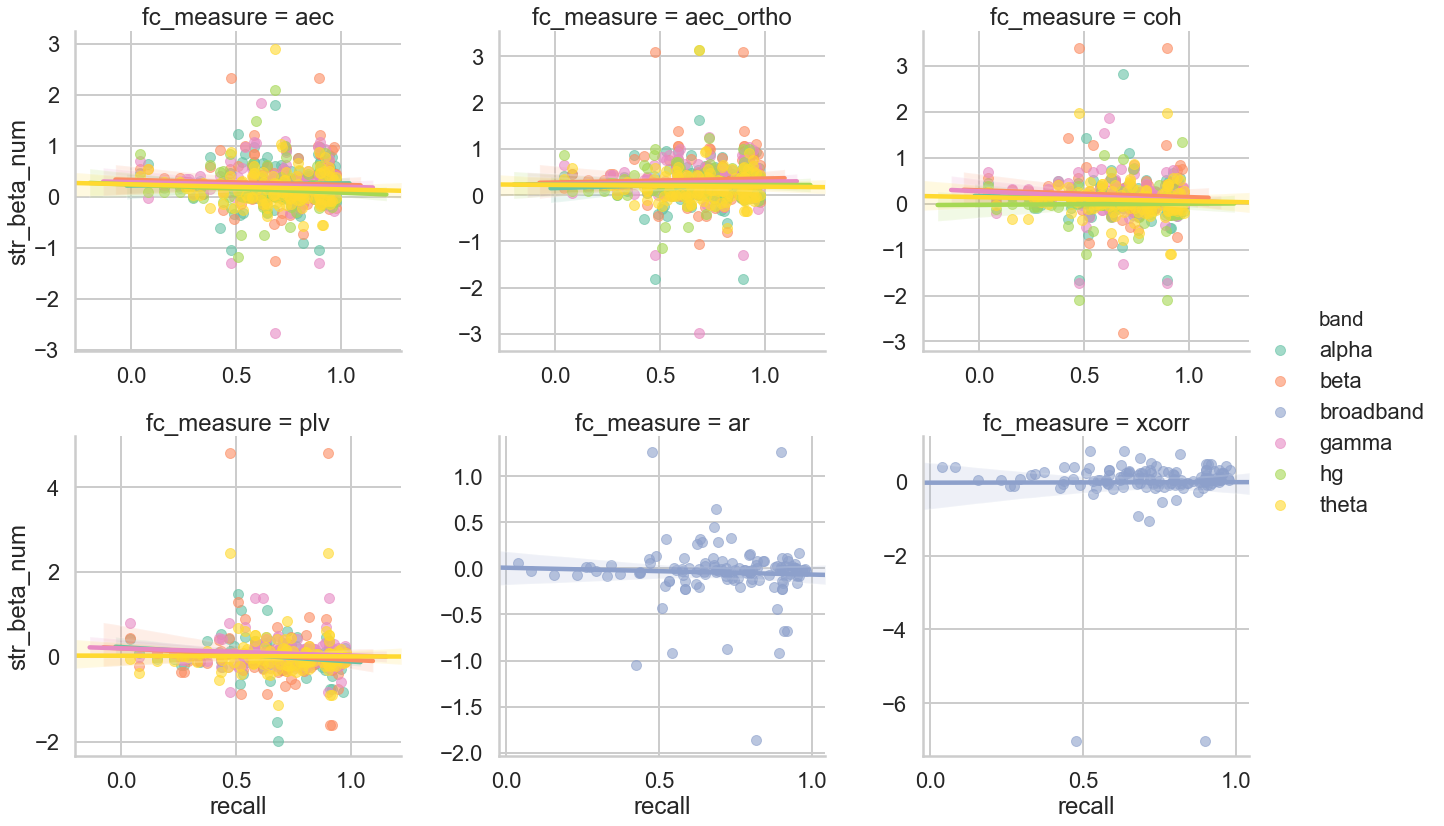

In [51]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

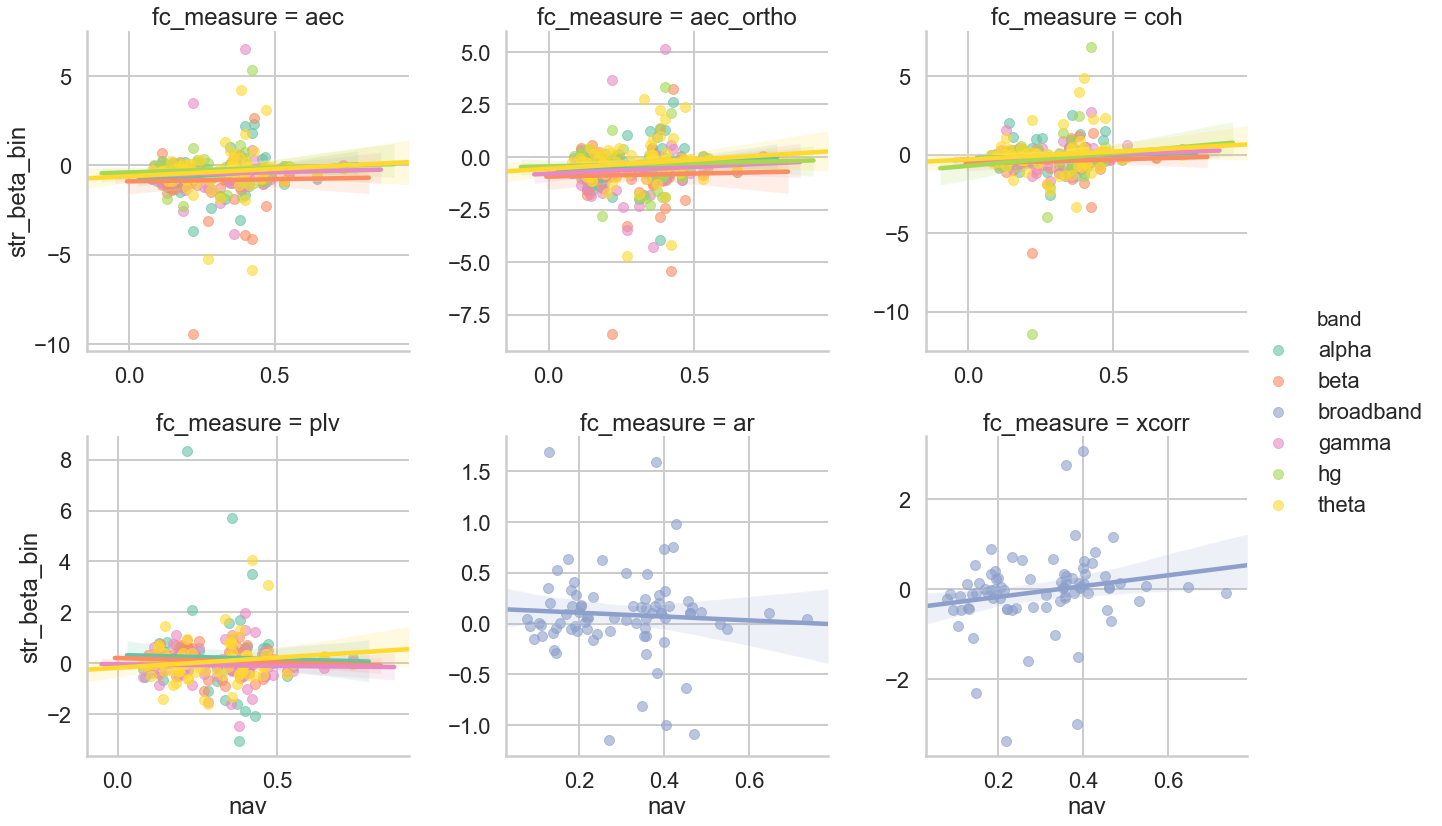

In [52]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

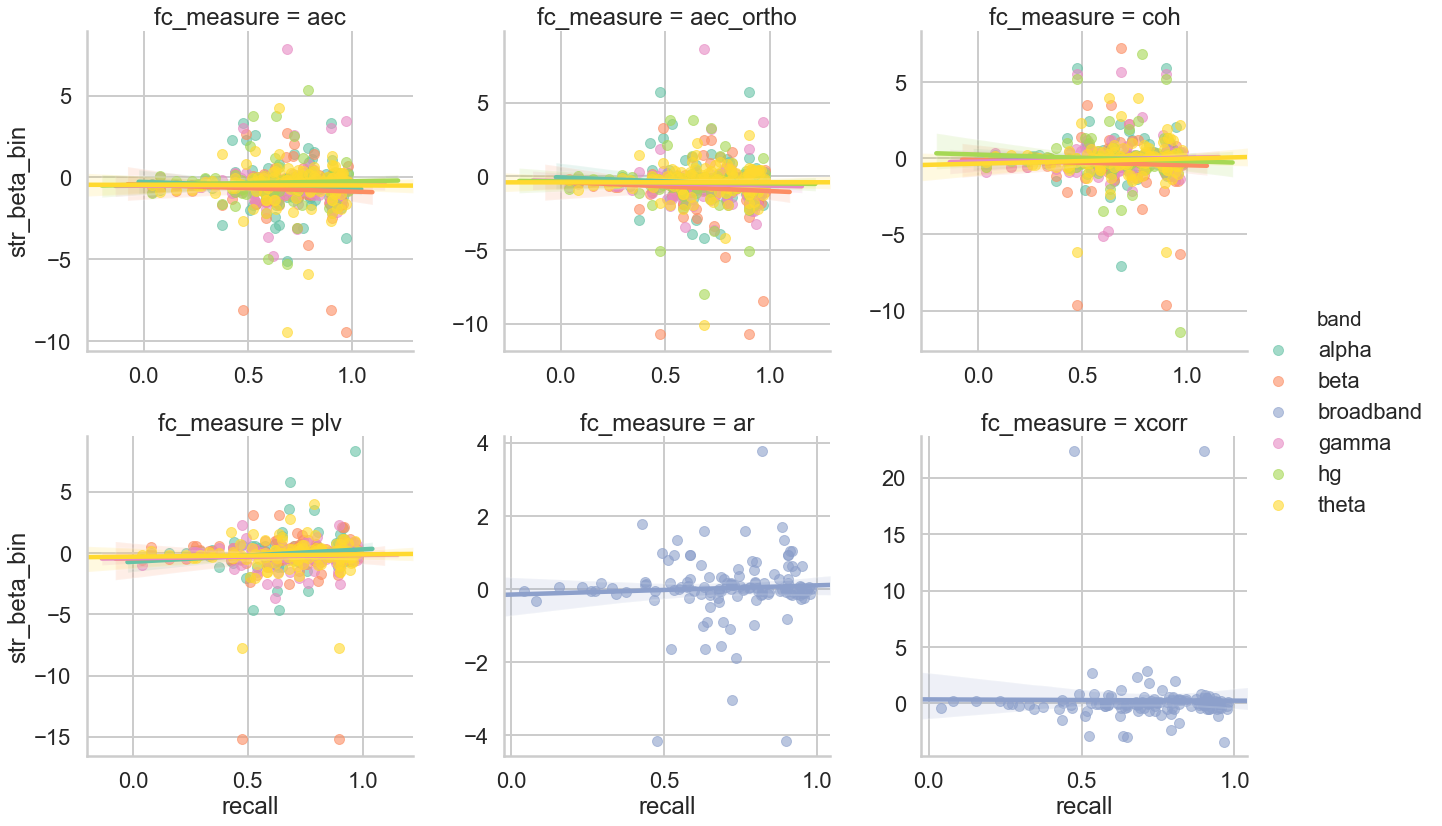

In [53]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})

In [54]:
# save
net_task_data.to_csv(f'{RAM_dir}group_analysis/win_{win}/net_task_data_clean.csv')

Other parameters

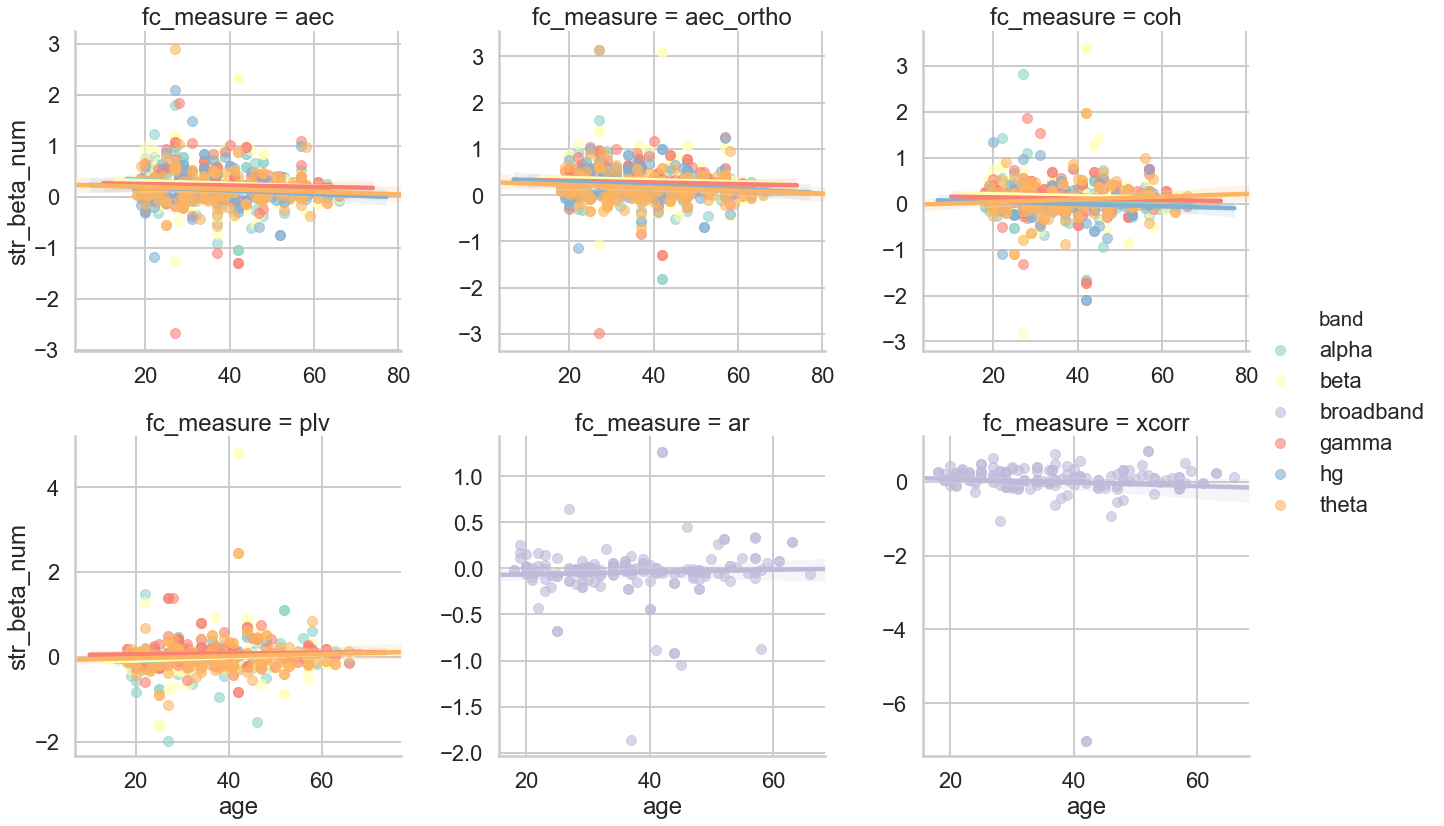

In [55]:
sns.lmplot(data=net_task_data, x='age', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


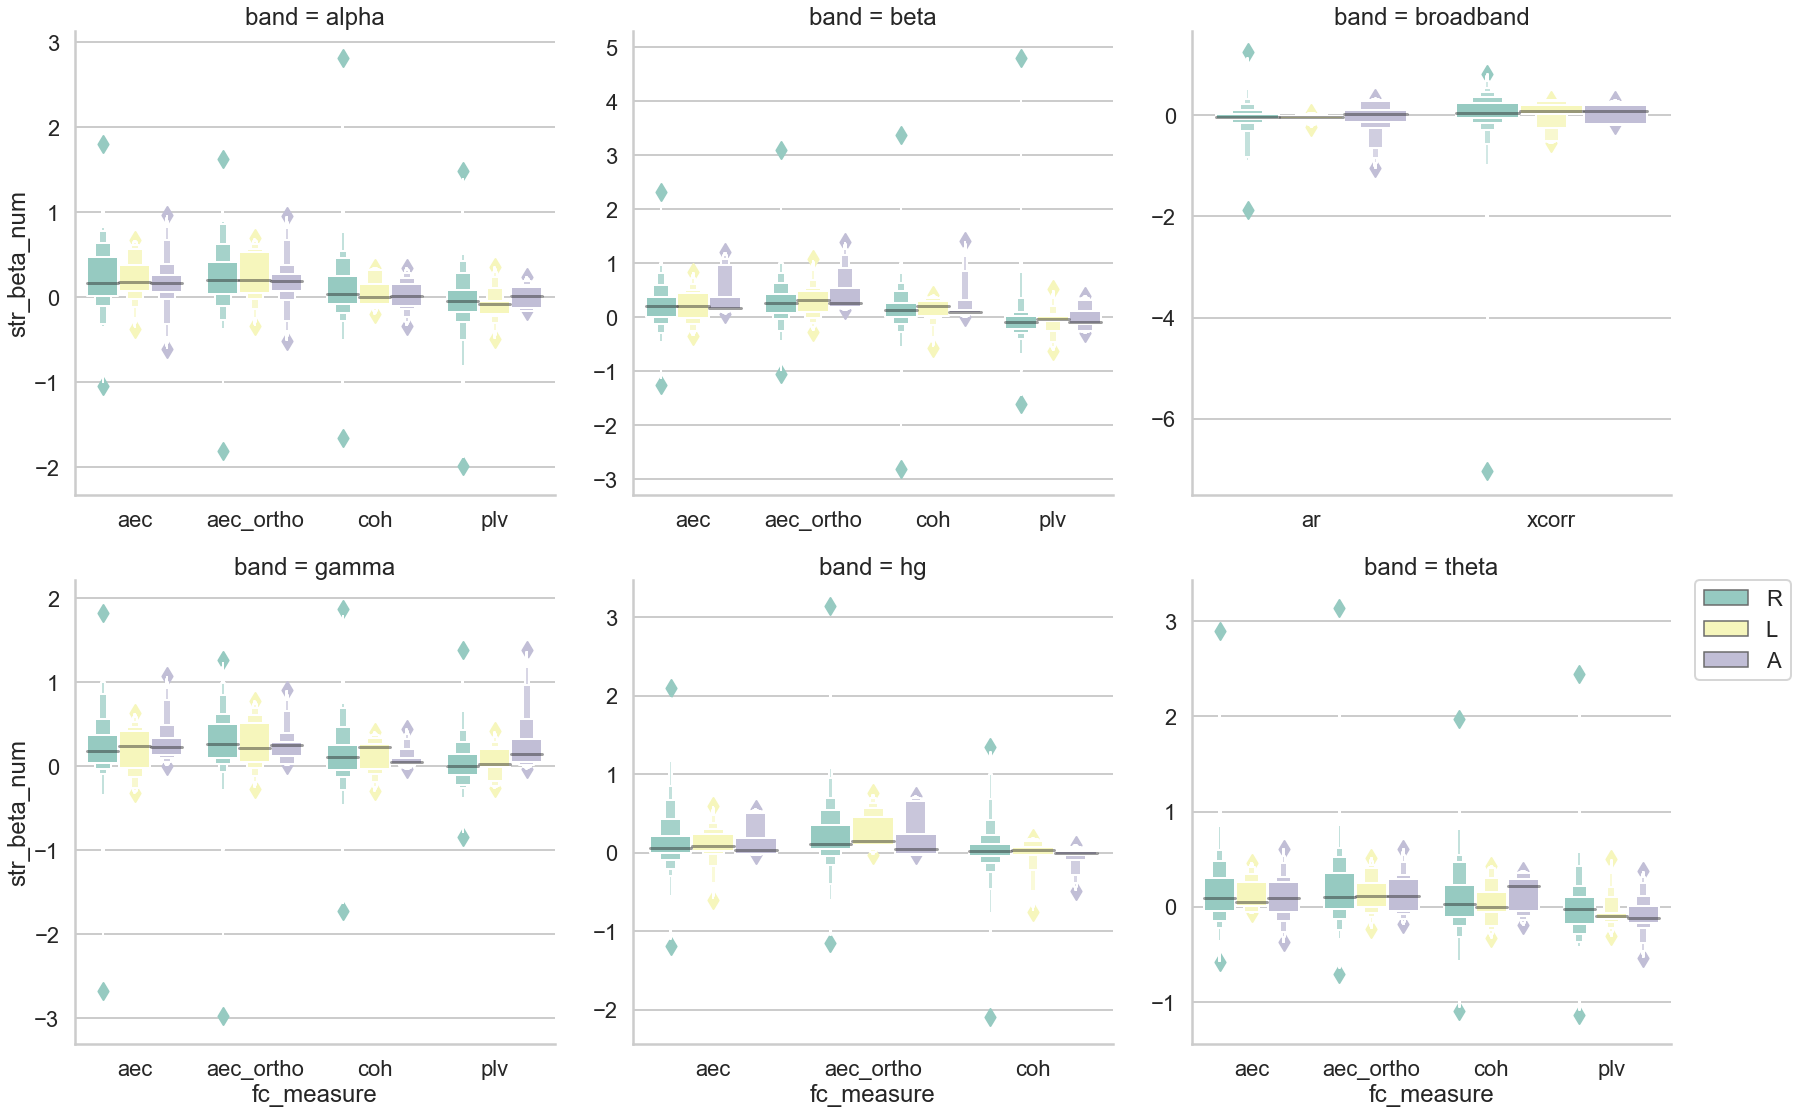

In [56]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'hand', palette = "Set3", hue_order=['R','L', 'A'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)